In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
np.random.seed(1) #ensure reproducibility
import math

pd.options.mode.chained_assignment = None 

In [3]:
import dame_flame
import random

## Data Cleaning (CREATING flame_enrollment.csv)

In [ ]:
# We start with a dataset that has registry data merged with unequal commute features data (LIFT_registry_UCMerged)

In [3]:
# Before rebinning UC covariates
LIFT_reg = pd.read_csv("/Users/JennyH/cisil-causal-inference/Data/LIFT_registry_UCMerged.csv")
LIFT_reg

,Unnamed: 0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,GEOID,Initial Load,Study Card,card_id,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D
0,0,36,Black or African American,Other,8/31/2019,2017-06-15,KCMCCS,530330288022,NaN,NaN,568-1,4,3,1,1,2
1,1,31,White,English,12/31/2018,2017-05-04,Promo Account,530330288022,NaN,NaN,7672-1,4,3,1,1,2
2,2,33,White,English,3/31/2021,2019-04-08,WithinReach,530330288022,NaN,NaN,7672-2,4,3,1,1,2
3,3,33,White,English,8/31/2019,2017-06-27,KCMCCS,530330288022,NaN,NaN,7776-1,4,3,1,1,2
4,4,27,Black or African American,English,8/31/2019,2017-06-15,KCMCCS,530330288022,NaN,NaN,18544-1,4,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112520,112520,39,White,English,10/31/2024,2022-02-14,King County Public Health,530530723056,NaN,Subsidized Annual Pass,270140-1,2,1,1,1,1
112521,112521,40,White,English,11/30/2023,2022-02-17,DSHS - ORCA LIFT (remote enrollment),530530704041,10.0,NaN,270468-1,1,4,1,1,4
112522,112522,36,White,English,3/31/2025,2022-02-22,King County Public Health,530610417042,10.0,NaN,270632-1,3,4,3,3,4
112523,112523,40,White,English,10/31/2024,2022-03-04,DSHS - subsidized annual pass (remote enrollment),530530723101,NaN,Subsidized Annual Pass,271502-1,2,2,4,3,2


In [4]:
# After rebinning UC covariates
LIFT_reg = pd.read_csv("/Users/JennyH/cisil-causal-inference/Data/LIFT_registry_UCMerged_new.csv")
LIFT_reg

,Unnamed: 0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,FIPS,Initial Load,Study Card,...,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q
0,0,40,Asian,English,8/31/2023,2021-09-28,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,3,3,2,8,8,9,9,5
1,1,51,Black or African American,English,8/31/2023,2021-10-19,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,3,3,2,8,8,9,9,5
2,2,42,Black or African American,English,4/30/2023,2021-04-29,HS Jail Health Services BA6586,530330092002,NaN,NaN,...,3,3,3,3,2,8,8,9,9,5
3,3,59,Black or African American,English,8/31/2023,2021-11-23,King County Public Health,530330092002,Subsidized Annual Pass,NaN,...,3,3,3,3,2,8,8,9,9,5
4,4,44,Hispanic or Latino,English,8/31/2023,2021-11-10,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,3,3,2,8,8,9,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93655,93655,36,Asian,English,2/28/2021,2018-05-15,King County Public Health,530330322122,NaN,NaN,...,0,0,0,0,0,1,0,1,1,2
93656,93656,36,Other,English,2/28/2021,2018-05-15,King County Public Health,530330322122,NaN,NaN,...,0,0,0,0,0,1,0,1,1,2
93657,93657,26,Multi-Racial,English,7/31/2020,2018-06-11,CCS BA3628,530330322122,Monthly Pass,NaN,...,0,0,0,0,0,1,0,1,1,2
93658,93658,58,White,English,3/31/2020,2018-06-13,King County Public Health,530530724083,NaN,NaN,...,1,0,0,1,1,3,1,1,2,2


In [5]:
LIFT_reg.columns = [c.replace(' ', '_') for c in LIFT_reg.columns]

In [6]:
# type(LIFT_reg.DateIssued[1])
LIFT_reg['DateIssued'] = pd.to_datetime(LIFT_reg['DateIssued'])
# LIFT_reg['Expiration'] = pd.to_datetime(LIFT_reg['Expiration'])

In [7]:
sap = LIFT_reg[(LIFT_reg.DateIssued >= "2020-10-01")]

In [8]:
sap["SAP"] = np.where(sap["Initial_Load"] == "Subsidized Annual Pass", 1, 0)
sap

,Unnamed:_0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,FIPS,Initial_Load,Study_Card,...,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP
0,0,40,Asian,English,8/31/2023,2021-09-28,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,3,2,8,8,9,9,5,1
1,1,51,Black or African American,English,8/31/2023,2021-10-19,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,3,2,8,8,9,9,5,1
2,2,42,Black or African American,English,4/30/2023,2021-04-29,HS Jail Health Services BA6586,530330092002,NaN,NaN,...,3,3,3,2,8,8,9,9,5,0
3,3,59,Black or African American,English,8/31/2023,2021-11-23,King County Public Health,530330092002,Subsidized Annual Pass,NaN,...,3,3,3,2,8,8,9,9,5,1
4,4,44,Hispanic or Latino,English,8/31/2023,2021-11-10,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,3,2,8,8,9,9,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,93559,22,Black or African American,English,12/31/2022,2020-10-27,King County Public Health,530330220034,NaN,NaN,...,0,0,0,0,5,0,1,0,0,0
93563,93563,36,White,English,5/31/2023,2020-10-28,KCMCCS,530610526071,10,NaN,...,2,0,0,3,0,7,0,1,8,0
93572,93572,63,White,English,5/31/2023,2020-10-22,DSHS - ORCA LIFT (remote enrollment),530530730053,10,NaN,...,0,0,0,1,0,0,1,2,4,0
93598,93598,52,White,English,4/30/2023,2020-10-03,CCS,530330321021,10,NaN,...,0,0,0,1,0,1,1,2,3,0


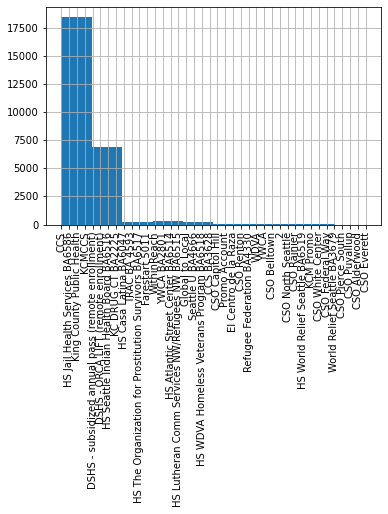

In [68]:
sap["CardIssuingAgency"].hist()
plt.xticks(rotation=90)
plt.show()

In [9]:
top5 = sap.value_counts("CardIssuingAgency").index[:5]
top5.tolist()

['King County Public Health',
 'DSHS - ORCA LIFT (remote enrollment)',
 'DSHS - subsidized annual pass (remote enrollment)',
 'CCS',
 'KCMCCS']

In [10]:
# Condense CardIssuingAgency to the top 5 agencies and and "other" category
sap['Agency'] = (sap.CardIssuingAgency.
                          apply(lambda x: x 
                                if x in top5 
                                else "Other"))
sap

,Unnamed:_0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,FIPS,Initial_Load,Study_Card,...,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency
0,0,40,Asian,English,8/31/2023,2021-09-28,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,2,8,8,9,9,5,1,CCS
1,1,51,Black or African American,English,8/31/2023,2021-10-19,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,2,8,8,9,9,5,1,CCS
2,2,42,Black or African American,English,4/30/2023,2021-04-29,HS Jail Health Services BA6586,530330092002,NaN,NaN,...,3,3,2,8,8,9,9,5,0,Other
3,3,59,Black or African American,English,8/31/2023,2021-11-23,King County Public Health,530330092002,Subsidized Annual Pass,NaN,...,3,3,2,8,8,9,9,5,1,King County Public Health
4,4,44,Hispanic or Latino,English,8/31/2023,2021-11-10,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,2,8,8,9,9,5,1,CCS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,93559,22,Black or African American,English,12/31/2022,2020-10-27,King County Public Health,530330220034,NaN,NaN,...,0,0,0,5,0,1,0,0,0,King County Public Health
93563,93563,36,White,English,5/31/2023,2020-10-28,KCMCCS,530610526071,10,NaN,...,0,0,3,0,7,0,1,8,0,KCMCCS
93572,93572,63,White,English,5/31/2023,2020-10-22,DSHS - ORCA LIFT (remote enrollment),530530730053,10,NaN,...,0,0,1,0,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment)
93598,93598,52,White,English,4/30/2023,2020-10-03,CCS,530330321021,10,NaN,...,0,0,1,0,1,1,2,3,0,CCS


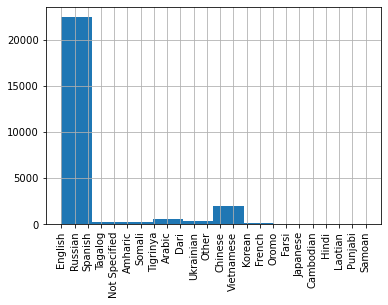

In [71]:
sap["LanguageSpoken"].hist()
plt.xticks(rotation=90)
plt.show()

In [11]:
sap["LanguageSpoken"].value_counts()

English          20754
Chinese           1631
Spanish           1499
Dari               402
Other              353
Vietnamese         310
Amharic            184
Not Specified      177
Russian            164
Tigrinya           124
Somali              73
Farsi               65
Korean              57
Ukrainian           52
French              46
Arabic              46
Tagalog             37
Oromo               13
Cambodian           12
Punjabi             12
Japanese             6
Hindi                5
Samoan               3
Laotian              3
Name: LanguageSpoken, dtype: int64

In [12]:
top5 = sap.value_counts("LanguageSpoken").index[:5]
top5.tolist()

['English', 'Chinese', 'Spanish', 'Dari', 'Other']

In [13]:
# Language is the condensed version of LanguageSpoken.
sap['Language'] = (sap.LanguageSpoken.
                          apply(lambda x: x 
                                if x in top5 
                                else "Other"))
sap

,Unnamed:_0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,FIPS,Initial_Load,Study_Card,...,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language
0,0,40,Asian,English,8/31/2023,2021-09-28,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,2,8,8,9,9,5,1,CCS,English
1,1,51,Black or African American,English,8/31/2023,2021-10-19,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,2,8,8,9,9,5,1,CCS,English
2,2,42,Black or African American,English,4/30/2023,2021-04-29,HS Jail Health Services BA6586,530330092002,NaN,NaN,...,3,2,8,8,9,9,5,0,Other,English
3,3,59,Black or African American,English,8/31/2023,2021-11-23,King County Public Health,530330092002,Subsidized Annual Pass,NaN,...,3,2,8,8,9,9,5,1,King County Public Health,English
4,4,44,Hispanic or Latino,English,8/31/2023,2021-11-10,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,2,8,8,9,9,5,1,CCS,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,93559,22,Black or African American,English,12/31/2022,2020-10-27,King County Public Health,530330220034,NaN,NaN,...,0,0,5,0,1,0,0,0,King County Public Health,English
93563,93563,36,White,English,5/31/2023,2020-10-28,KCMCCS,530610526071,10,NaN,...,0,3,0,7,0,1,8,0,KCMCCS,English
93572,93572,63,White,English,5/31/2023,2020-10-22,DSHS - ORCA LIFT (remote enrollment),530530730053,10,NaN,...,0,1,0,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),English
93598,93598,52,White,English,4/30/2023,2020-10-03,CCS,530330321021,10,NaN,...,0,1,0,1,1,2,3,0,CCS,English


In [14]:
# split into user id and card number
sap[['user_id', 'stage']] = sap['card_id'].str.split('-', expand=True)

In [15]:
# bin age.
sap['Age_bin']=pd.cut(x = sap['Age'],
                        bins = [0,25,35,45,55,65,200], 
                        labels = [0,1,2,3,4,5])

# sap.drop(columns=['RaceDesc','LanguageSpoken', 'CardIssuingAgency'],inplace=True)

In [16]:
sap = sap.loc[:, ~sap.columns.isin(['Study_Card', 'card_id','DateIssued','GEOID','Unnamed:_0','Expiration','LanguageSpoken','Age','CardIssuingAgency'])]
sap

,RaceDesc,FIPS,Initial_Load,duplicate,stage,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,...,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,user_id,Age_bin
0,Asian,530330092002,Subsidized Annual Pass,False,8,61080,2.245899,708,1.487184,0.721379,...,8,8,9,9,5,1,CCS,English,61080,2
1,Black or African American,530330092002,Subsidized Annual Pass,False,6,107444,2.245899,708,1.487184,0.721379,...,8,8,9,9,5,1,CCS,English,107444,3
2,Black or African American,530330092002,NaN,False,6,57528,2.245899,708,1.487184,0.721379,...,8,8,9,9,5,0,Other,English,57528,2
3,Black or African American,530330092002,Subsidized Annual Pass,False,5,10168,2.245899,708,1.487184,0.721379,...,8,8,9,9,5,1,King County Public Health,English,10168,4
4,Hispanic or Latino,530330092002,Subsidized Annual Pass,False,5,172698,2.245899,708,1.487184,0.721379,...,8,8,9,9,5,1,CCS,English,172698,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,Black or African American,530330220034,NaN,False,1,237038,1.456875,174,0.017855,0.000024,...,5,0,1,0,0,0,King County Public Health,English,237038,0
93563,White,530610526071,10,False,1,237256,0.472162,493,0.001867,0.001867,...,0,7,0,1,8,0,KCMCCS,English,237256,2
93572,White,530530730053,10,False,1,236550,0.229570,231,0.004476,0.004476,...,0,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),English,236550,4
93598,White,530330321021,10,False,1,39120,0.400939,239,0.005537,0.005537,...,0,1,1,2,3,0,CCS,English,39120,3


In [17]:
sap["SAP"].value_counts()

0    17900
1     8173
Name: SAP, dtype: int64

In [18]:
print(8173/17900)

0.4565921787709497


In [19]:
# Create the feature 'count_enroll' to count the number of enrollments per user_id.

sap["stage"] = sap["stage"].astype(int)
sap['count_enroll'] = sap['stage']
sap['count_enroll']
#count_enroll = sap.groupby(["user_id"]).count()[['stage']]
#count_enroll = count_enroll.rename(columns={'stage': 'count_enroll'})

0        8
1        6
2        6
3        5
4        5
        ..
93559    1
93563    1
93572    1
93598    1
93639    1
Name: count_enroll, Length: 26073, dtype: int64

In [20]:
# sap.groupby(["user_id"]).head()
print(len(sap["user_id"]))
print(len(sap["user_id"].unique()))

26073
26073


In [22]:
# sap = sap.merge(count_enroll, on='user_id', how='left') # 117728 rows
sap_enrollment = sap
sap_enrollment = sap.loc[:, ~sap.columns.isin(['stage'])]
sap_enrollment

,RaceDesc,FIPS,Initial_Load,duplicate,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,MSA,...,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,user_id,Age_bin,count_enroll
0,Asian,530330092002,Subsidized Annual Pass,False,61080,2.245899,708,1.487184,0.721379,Seattle,...,8,9,9,5,1,CCS,English,61080,2,8
1,Black or African American,530330092002,Subsidized Annual Pass,False,107444,2.245899,708,1.487184,0.721379,Seattle,...,8,9,9,5,1,CCS,English,107444,3,6
2,Black or African American,530330092002,NaN,False,57528,2.245899,708,1.487184,0.721379,Seattle,...,8,9,9,5,0,Other,English,57528,2,6
3,Black or African American,530330092002,Subsidized Annual Pass,False,10168,2.245899,708,1.487184,0.721379,Seattle,...,8,9,9,5,1,King County Public Health,English,10168,4,5
4,Hispanic or Latino,530330092002,Subsidized Annual Pass,False,172698,2.245899,708,1.487184,0.721379,Seattle,...,8,9,9,5,1,CCS,English,172698,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,Black or African American,530330220034,NaN,False,237038,1.456875,174,0.017855,0.000024,Seattle,...,0,1,0,0,0,King County Public Health,English,237038,0,1
93563,White,530610526071,10,False,237256,0.472162,493,0.001867,0.001867,Seattle,...,7,0,1,8,0,KCMCCS,English,237256,2,1
93572,White,530530730053,10,False,236550,0.229570,231,0.004476,0.004476,Seattle,...,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),English,236550,4,1
93598,White,530330321021,10,False,39120,0.400939,239,0.005537,0.005537,Seattle,...,1,1,2,3,0,CCS,English,39120,3,1


In [23]:
sap_enrollment['count_enroll'] = sap_enrollment['count_enroll'].astype(int)

In [24]:
ds_general = sap_enrollment.loc[:, ~sap_enrollment.columns.isin(['FIPS','Age','DateIssued','Expiration', 'duplicate'])]
ds_general

,RaceDesc,Initial_Load,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,MSA,spatialmismatch,OverallJobAccess_quantileNum_4q,...,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,user_id,Age_bin,count_enroll
0,Asian,Subsidized Annual Pass,61080,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,9,9,5,1,CCS,English,61080,2,8
1,Black or African American,Subsidized Annual Pass,107444,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,9,9,5,1,CCS,English,107444,3,6
2,Black or African American,NaN,57528,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,9,9,5,0,Other,English,57528,2,6
3,Black or African American,Subsidized Annual Pass,10168,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,9,9,5,1,King County Public Health,English,10168,4,5
4,Hispanic or Latino,Subsidized Annual Pass,172698,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,9,9,5,1,CCS,English,172698,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,Black or African American,NaN,237038,1.456875,174,0.017855,0.000024,Seattle,0.032133,2,...,0,1,0,0,0,King County Public Health,English,237038,0,1
93563,White,10,237256,0.472162,493,0.001867,0.001867,Seattle,0.132258,0,...,7,0,1,8,0,KCMCCS,English,237256,2,1
93572,White,10,236550,0.229570,231,0.004476,0.004476,Seattle,0.066728,0,...,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),English,236550,4,1
93598,White,10,39120,0.400939,239,0.005537,0.005537,Seattle,0.065562,0,...,1,1,2,3,0,CCS,English,39120,3,1


In [25]:
ds_general = ds_general.drop_duplicates()
ds_general # 27320 rows × 12 columns [27320 unique user_id's]

,RaceDesc,Initial_Load,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,MSA,spatialmismatch,OverallJobAccess_quantileNum_4q,...,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,user_id,Age_bin,count_enroll
0,Asian,Subsidized Annual Pass,61080,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,9,9,5,1,CCS,English,61080,2,8
1,Black or African American,Subsidized Annual Pass,107444,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,9,9,5,1,CCS,English,107444,3,6
2,Black or African American,NaN,57528,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,9,9,5,0,Other,English,57528,2,6
3,Black or African American,Subsidized Annual Pass,10168,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,9,9,5,1,King County Public Health,English,10168,4,5
4,Hispanic or Latino,Subsidized Annual Pass,172698,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,9,9,5,1,CCS,English,172698,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,Black or African American,NaN,237038,1.456875,174,0.017855,0.000024,Seattle,0.032133,2,...,0,1,0,0,0,King County Public Health,English,237038,0,1
93563,White,10,237256,0.472162,493,0.001867,0.001867,Seattle,0.132258,0,...,7,0,1,8,0,KCMCCS,English,237256,2,1
93572,White,10,236550,0.229570,231,0.004476,0.004476,Seattle,0.066728,0,...,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),English,236550,4,1
93598,White,10,39120,0.400939,239,0.005537,0.005537,Seattle,0.065562,0,...,1,1,2,3,0,CCS,English,39120,3,1


In [29]:
ds_general.isnull().sum() 

RaceDesc                              0
Initial_Load                          0
id                                    0
OverallJobAccess                      0
lowwagelaborforce                     0
Access30Transit                       0
Access30Transit_ts                    0
MSA                                   0
spatialmismatch                       0
OverallJobAccess_quantileNum_4q       0
lowwagelaborforce_quantileNum_4q      0
Access30Transit_quantileNum_4q        0
Access30Transit_ts_quantileNum_4q     0
spatialmismatch_quantileNum_4q        0
OverallJobAccess_quantileNum_10q      0
lowwagelaborforce_quantileNum_10q     0
Access30Transit_quantileNum_10q       0
Access30Transit_ts_quantileNum_10q    0
spatialmismatch_quantileNum_10q       0
SAP                                   0
Agency                                0
Language                              0
user_id                               0
Age_bin                               0
count_enroll                          0


### Dropping the few rows with na values before running FLAME

In [27]:
# 1 value in Age_bin was NA.
ds_general = ds_general[ds_general['Age_bin'].notna()]
ds_general

,RaceDesc,Initial_Load,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,MSA,spatialmismatch,OverallJobAccess_quantileNum_4q,...,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,user_id,Age_bin,count_enroll
0,Asian,Subsidized Annual Pass,61080,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,9,9,5,1,CCS,English,61080,2,8
1,Black or African American,Subsidized Annual Pass,107444,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,9,9,5,1,CCS,English,107444,3,6
2,Black or African American,NaN,57528,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,9,9,5,0,Other,English,57528,2,6
3,Black or African American,Subsidized Annual Pass,10168,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,9,9,5,1,King County Public Health,English,10168,4,5
4,Hispanic or Latino,Subsidized Annual Pass,172698,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,9,9,5,1,CCS,English,172698,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,Black or African American,NaN,237038,1.456875,174,0.017855,0.000024,Seattle,0.032133,2,...,0,1,0,0,0,King County Public Health,English,237038,0,1
93563,White,10,237256,0.472162,493,0.001867,0.001867,Seattle,0.132258,0,...,7,0,1,8,0,KCMCCS,English,237256,2,1
93572,White,10,236550,0.229570,231,0.004476,0.004476,Seattle,0.066728,0,...,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),English,236550,4,1
93598,White,10,39120,0.400939,239,0.005537,0.005537,Seattle,0.065562,0,...,1,1,2,3,0,CCS,English,39120,3,1


In [28]:
# Fill in the NA race values, labeling as "Other"
ds_general["RaceDesc"] = ds_general["RaceDesc"].fillna(value="Other")
ds_general["Initial_Load"] = ds_general["Initial_Load"].fillna(value="NA")
ds_general

,RaceDesc,Initial_Load,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,MSA,spatialmismatch,OverallJobAccess_quantileNum_4q,...,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,user_id,Age_bin,count_enroll
0,Asian,Subsidized Annual Pass,61080,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,9,9,5,1,CCS,English,61080,2,8
1,Black or African American,Subsidized Annual Pass,107444,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,9,9,5,1,CCS,English,107444,3,6
2,Black or African American,NA,57528,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,9,9,5,0,Other,English,57528,2,6
3,Black or African American,Subsidized Annual Pass,10168,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,9,9,5,1,King County Public Health,English,10168,4,5
4,Hispanic or Latino,Subsidized Annual Pass,172698,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,9,9,5,1,CCS,English,172698,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,Black or African American,NA,237038,1.456875,174,0.017855,0.000024,Seattle,0.032133,2,...,0,1,0,0,0,King County Public Health,English,237038,0,1
93563,White,10,237256,0.472162,493,0.001867,0.001867,Seattle,0.132258,0,...,7,0,1,8,0,KCMCCS,English,237256,2,1
93572,White,10,236550,0.229570,231,0.004476,0.004476,Seattle,0.066728,0,...,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),English,236550,4,1
93598,White,10,39120,0.400939,239,0.005537,0.005537,Seattle,0.065562,0,...,1,1,2,3,0,CCS,English,39120,3,1


# Visualizing Count Enrollment

Text(0.5, 1.0, 'Reenrollment count (individuals in SAP)')

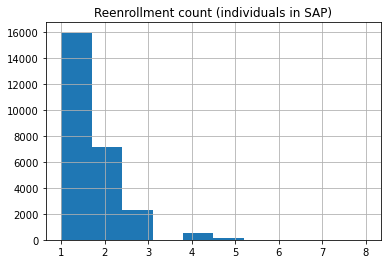

In [108]:
ds_general["count_enroll"].hist()
plt.title('Reenrollment count (individuals in SAP)')

Text(0.5, 1.0, 'Reenrollment count (individuals not in SAP)')

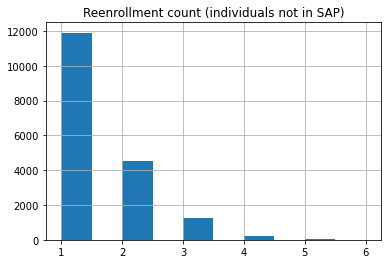

In [109]:
ds_general[(ds_general.SAP == 0)]["count_enroll"].hist()
plt.title('Reenrollment count (individuals not in SAP)')

<AxesSubplot:>

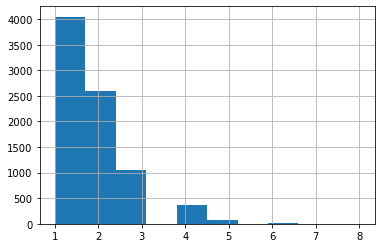

In [110]:
ds_general[(ds_general.SAP == 1)]["count_enroll"].hist()
plt.title('Reenrollment count (enrolled in SAP)')

<AxesSubplot:>

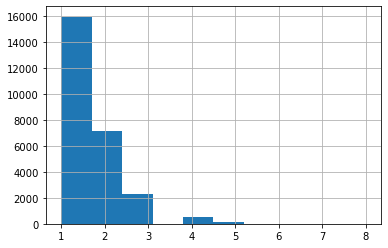

In [111]:
# loadings per week. We see outliers at 30-45
ds_general["count_enroll"].hist()

In [30]:
# Drop User_id for matching
match_all = ds_general.loc[:, ~ds_general.columns.isin(['user_id','Age'])]
match_all

,RaceDesc,Initial_Load,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,MSA,spatialmismatch,OverallJobAccess_quantileNum_4q,...,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,Age_bin,count_enroll
0,Asian,Subsidized Annual Pass,61080,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,CCS,English,2,8
1,Black or African American,Subsidized Annual Pass,107444,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,CCS,English,3,6
2,Black or African American,NA,57528,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,0,Other,English,2,6
3,Black or African American,Subsidized Annual Pass,10168,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,King County Public Health,English,4,5
4,Hispanic or Latino,Subsidized Annual Pass,172698,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,CCS,English,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,Black or African American,NA,237038,1.456875,174,0.017855,0.000024,Seattle,0.032133,2,...,5,0,1,0,0,0,King County Public Health,English,0,1
93563,White,10,237256,0.472162,493,0.001867,0.001867,Seattle,0.132258,0,...,0,7,0,1,8,0,KCMCCS,English,2,1
93572,White,10,236550,0.229570,231,0.004476,0.004476,Seattle,0.066728,0,...,0,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),English,4,1
93598,White,10,39120,0.400939,239,0.005537,0.005537,Seattle,0.065562,0,...,0,1,1,2,3,0,CCS,English,3,1


In [31]:
match_all.RaceDesc.value_counts()

White                                        8855
Black or African American                    5209
Asian                                        4057
Hispanic or Latino                           2656
Not Specified                                2429
Other                                        1556
American Indian or Alaska Native              647
Multi-Racial                                  349
Native Hawaiian or Other Pacific Islander     314
Name: RaceDesc, dtype: int64

## Mapping categorical variables to ordinal values for FLAME.

In [32]:
# Map all string categorical variables to numbers.
race = {"White": 0, "Black or African American": 1, "Asian": 2, "Hispanic or Latino": 3, "Not Specified": 4, 'Other': 5, 'American Indian or Alaska Native': 6, "Multi-Racial": 7, "Native Hawaiian or Other Pacific Islander": 8}
match_all['RaceDesc'] = match_all['RaceDesc'].map(race)
match_all
# df_trunc['rf_phyp'] = df_trunc['rf_phyp'].map(d)

,RaceDesc,Initial_Load,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,MSA,spatialmismatch,OverallJobAccess_quantileNum_4q,...,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,Age_bin,count_enroll
0,2,Subsidized Annual Pass,61080,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,CCS,English,2,8
1,1,Subsidized Annual Pass,107444,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,CCS,English,3,6
2,1,NA,57528,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,0,Other,English,2,6
3,1,Subsidized Annual Pass,10168,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,King County Public Health,English,4,5
4,3,Subsidized Annual Pass,172698,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,CCS,English,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,1,NA,237038,1.456875,174,0.017855,0.000024,Seattle,0.032133,2,...,5,0,1,0,0,0,King County Public Health,English,0,1
93563,0,10,237256,0.472162,493,0.001867,0.001867,Seattle,0.132258,0,...,0,7,0,1,8,0,KCMCCS,English,2,1
93572,0,10,236550,0.229570,231,0.004476,0.004476,Seattle,0.066728,0,...,0,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),English,4,1
93598,0,10,39120,0.400939,239,0.005537,0.005537,Seattle,0.065562,0,...,0,1,1,2,3,0,CCS,English,3,1


In [33]:
language = {"English": 0, "Chinese": 1, "Spanish": 2, "Dari": 3, "Vietnamese": 4, 'Other': 5}
match_all['Language'] = match_all['Language'].map(language)
match_all

,RaceDesc,Initial_Load,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,MSA,spatialmismatch,OverallJobAccess_quantileNum_4q,...,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,Age_bin,count_enroll
0,2,Subsidized Annual Pass,61080,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,CCS,0,2,8
1,1,Subsidized Annual Pass,107444,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,CCS,0,3,6
2,1,NA,57528,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,0,Other,0,2,6
3,1,Subsidized Annual Pass,10168,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,King County Public Health,0,4,5
4,3,Subsidized Annual Pass,172698,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,CCS,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,1,NA,237038,1.456875,174,0.017855,0.000024,Seattle,0.032133,2,...,5,0,1,0,0,0,King County Public Health,0,0,1
93563,0,10,237256,0.472162,493,0.001867,0.001867,Seattle,0.132258,0,...,0,7,0,1,8,0,KCMCCS,0,2,1
93572,0,10,236550,0.229570,231,0.004476,0.004476,Seattle,0.066728,0,...,0,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),0,4,1
93598,0,10,39120,0.400939,239,0.005537,0.005537,Seattle,0.065562,0,...,0,1,1,2,3,0,CCS,0,3,1


In [48]:
a = {"King County Public Health": 0, "DSHS - ORCA LIFT (remote enrollment)": 1, "DSHS - subsidized annual pass (remote enrollment)": 2, "CCS": 3, "KCMCCS": 4, 'Other': 5}
match_all['Agency'] = match_all['Agency'].map(a)
match_all

,RaceDesc,Initial_Load,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,SAP,Agency,Language,Age_bin,count_enroll
0,2,1,3,3,3,3,2,1,3,0,2,8
1,1,1,3,3,3,3,2,1,3,0,3,6
2,1,2,3,3,3,3,2,0,5,0,2,6
3,1,1,3,3,3,3,2,1,0,0,4,5
4,3,1,3,3,3,3,2,1,3,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
26067,1,2,2,0,0,0,0,0,0,0,0,1
26068,0,0,0,2,0,0,3,0,4,0,2,1
26069,0,0,0,0,0,0,1,0,1,0,4,1
26070,0,0,0,0,0,0,1,0,3,0,3,1


In [39]:
a = {"10": 0, "Subsidized Annual Pass": 1, "NA": 2, "70": 3, "20": 4, '50': 5,  '15': 6, 'Misc. Pass':7, '30': 8, 'Passport': 9 }
match_all['Initial_Load'] = match_all['Initial_Load'].map(a)
match_all

,RaceDesc,Initial_Load,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,MSA,spatialmismatch,OverallJobAccess_quantileNum_4q,...,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,Age_bin,count_enroll
0,2,1,61080,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,CCS,0,2,8
1,1,1,107444,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,CCS,0,3,6
2,1,2,57528,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,0,Other,0,2,6
3,1,1,10168,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,King County Public Health,0,4,5
4,3,1,172698,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,CCS,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,1,2,237038,1.456875,174,0.017855,0.000024,Seattle,0.032133,2,...,5,0,1,0,0,0,King County Public Health,0,0,1
93563,0,0,237256,0.472162,493,0.001867,0.001867,Seattle,0.132258,0,...,0,7,0,1,8,0,KCMCCS,0,2,1
93572,0,0,236550,0.229570,231,0.004476,0.004476,Seattle,0.066728,0,...,0,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),0,4,1
93598,0,0,39120,0.400939,239,0.005537,0.005537,Seattle,0.065562,0,...,0,1,1,2,3,0,CCS,0,3,1


In [38]:
match_all['Initial_Load'].value_counts()

10                        15898
Subsidized Annual Pass     8173
NA                         1619
70                          155
20                           76
50                           72
15                           39
Misc. Pass                   31
30                            5
Passport                      4
Name: Initial_Load, dtype: int64

In [40]:
# match_all.to_csv('/Users/JennyH/cisil-causal-inference/Data/flame_enrollment2.csv')  

# FLAME Algorithm For Matching (Starts Here if you have flame_enrollment3.csv)

In [60]:
flame_enr_v3 = '/Users/albertsun/Projects/data/flame_enrollment3.csv' #"/Users/JennyH/cisil-causal-inference/Data/flame_enrollment3.csv"

match_all = pd.read_csv(flame_enr_v3)
match_all = match_all.loc[:, ~match_all.columns.isin(['Unnamed: 0'])]
match_all

,RaceDesc,SAP,count_enroll,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,Agency,Language,Age_bin
0,2,1,3,3,3,3,3,2,3,0,2
1,1,0,1,3,3,3,3,2,5,0,2
2,1,1,2,3,3,3,3,2,3,0,3
3,0,0,1,3,3,3,3,2,3,0,4
4,1,1,2,3,3,3,3,2,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...
26041,8,0,1,0,0,2,0,0,0,0,0
26042,2,0,1,0,2,0,0,3,4,0,0
26043,0,1,1,0,1,0,1,2,2,0,3
26044,0,1,1,3,0,1,1,0,2,0,2


In [61]:
match_all = match_all.replace({6: 5, 
                  7:5,
                  8:5})

#match_all.RaceDesc.value_counts() 
# merge the multi-racial, pacific islander, american indian categories into the “other” category 6, 7, 8 -> other 

In [63]:
match_all = match_all.loc[:, ~match_all.columns.isin(['id', 'OverallJobAccess', 'lowwagelaborforce', 'Access30Transit', 'Access30Transit_ts', 'MSA', 'spatialmismatch'])]
match_all

,RaceDesc,SAP,count_enroll,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,Agency,Language,Age_bin
0,2,1,3,3,3,3,3,2,3,0,2
1,1,0,1,3,3,3,3,2,5,0,2
2,1,1,2,3,3,3,3,2,3,0,3
3,0,0,1,3,3,3,3,2,3,0,4
4,1,1,2,3,3,3,3,2,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...
26041,5,0,1,0,0,2,0,0,0,0,0
26042,2,0,1,0,2,0,0,3,4,0,0
26043,0,1,1,0,1,0,1,2,2,0,3
26044,0,1,1,3,0,1,1,0,2,0,2


In [64]:
# Remove Decile quantiles for now.
match_all = match_all.loc[:, ~match_all.columns.isin([
    'OverallJobAccess_quantileNum_10q', 'lowwagelaborforce_quantileNum_10q', 
    'Access30Transit_quantileNum_10q', 'Access30Transit_ts_quantileNum_10q', 
    'spatialmismatch_quantileNum_10q'])]


In [65]:
match_all

,RaceDesc,SAP,count_enroll,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,Agency,Language,Age_bin
0,2,1,3,3,3,3,3,2,3,0,2
1,1,0,1,3,3,3,3,2,5,0,2
2,1,1,2,3,3,3,3,2,3,0,3
3,0,0,1,3,3,3,3,2,3,0,4
4,1,1,2,3,3,3,3,2,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...
26041,5,0,1,0,0,2,0,0,0,0,0
26042,2,0,1,0,2,0,0,3,4,0,0
26043,0,1,1,0,1,0,1,2,2,0,3
26044,0,1,1,3,0,1,1,0,2,0,2


In [66]:
# flame is faster but dame considers more covariate sets. stopping upon matching all t'ed units.
model_flame_AMT = dame_flame.matching.FLAME(repeats=False, 
                                            verbose=3, 
                                            early_stop_iterations=30, 
                                            stop_unmatched_t = True, 
                                            adaptive_weights='decisiontreeCV', 
                                            alpha=0.5, 
                                            want_pe=True)

In [67]:
model_flame_AMT.fit(holdout_data=False, treatment_column_name='SAP', outcome_column_name='count_enroll')
result_flame_AMT = model_flame_AMT.predict(match_all)

Iteration number:  1
	Number of matched groups formed in total:  1135
	Unmatched treated units:  5241 out of a total of  8172 treated units
	Unmatched control units:  13675 out of a total of  17874 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  7130
	Number of matches made so far:  7130
	In this iteration, the covariates dropped are:  set()
Iteration number:  2
	Number of matched groups formed in total:  1738
	Unmatched treated units:  3702 out of a total of  8172 treated units
	Unmatched control units:  10998 out of a total of  17874 control units
	Predictive error of covariates chosen this iteration:  0.5991354718546893
	Number of matches made in this iteration:  4216
	Number of matches made so far:  11346
	In this iteration, the covariates dropped are:  Age_bin
Iteration number:  3
	Number of matched groups formed in total:  2499
	Unmatched treated units:  569 out of a total of  8172 treated units
	Unmatched contro

flame_enrollment2.csv
Unmatched treated units:  0 out of a total of  8173 treated units
Unmatched control units:  136 out of a total of  17899 control units

flame_enrollment3.csv
Unmatched treated units:  0 out of a total of  8172 treated units
Unmatched control units:  1354 out of a total of  17874 control units

# Cate Plots
5-17-2023

In [69]:
match_all

,RaceDesc,SAP,count_enroll,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,Agency,Language,Age_bin
0,2,1,3,3,3,3,3,2,3,0,2
1,1,0,1,3,3,3,3,2,5,0,2
2,1,1,2,3,3,3,3,2,3,0,3
3,0,0,1,3,3,3,3,2,3,0,4
4,1,1,2,3,3,3,3,2,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...
26041,5,0,1,0,0,2,0,0,0,0,0
26042,2,0,1,0,2,0,0,3,4,0,0
26043,0,1,1,0,1,0,1,2,2,0,3
26044,0,1,1,3,0,1,1,0,2,0,2


In [108]:
def get_cates_and_counts(df, column_name: str) -> pd.DataFrame:
    """
    Return pd DataFrame with CATE values and Count Values to plot both
    
    - 'CATE' column has CATE value corresponding to all the units with that value in the column
    - 'Counts' column has the number of all units in the data that are matched to a group that 
    has that specific value, i.e. 1791 individuals/units with matched in a group such that race=White
    """
    cate_unit_count = {}
    cates = {} #{asian: [0.1, 0.3, ..], black: [0.1, 0.3, ..], ...}
    cates_avg = {} #{asian: 4, black: 5, ...}
    
    for val in set(df[column_name].tolist()):
        cates[val] = []
        print(f'Calculating cates for column: {column_name}, for value: {val}')
        for i in df[(df[column_name] == val)].index:
            unit_cate = dame_flame.utils.post_processing.CATE(model_flame_AMT, i)
            if not math.isnan(unit_cate):
                cates[val].append(unit_cate)
                if val not in cate_unit_count:
                    cate_unit_count[val] = 0
                cate_unit_count[val] += 1
        cates_avg[val] = sum(cates[val]) / len(cates[val])
        
    cates_avg_series = pd.Series(cates_avg)
    cate_unit_count_series = pd.Series(cate_unit_count)
    
    num_lvls = df[column_name].value_counts()
    
    frame = {'CATE': cates_avg_series, 
             'Counts': num_lvls,
            'num_units_used': cate_unit_count_series}
    data = pd.DataFrame(frame)
    data.index = data.index.map(str)
    data = data.sort_index() 
    return data

In [109]:
# covariates of interest: 
cols = ['RaceDesc','OverallJobAccess_quantileNum_4q','lowwagelaborforce_quantileNum_4q',
        'Access30Transit_quantileNum_4q','Access30Transit_ts_quantileNum_4q','spatialmismatch_quantileNum_4q',
        'Agency','Language','Age_bin']

df_dic = {}

def export_cate_df(cols: list): 
    """
    Create dictionary where
    - keys are column (i.e. White)
    - values are pandas dataframe (i.e. pandas dataframe created using get_cates_and_counts() that shows CATE
    values and counts)
    """
    for col in cols:
        df_dic[col] = get_cates_and_counts(match_all, col)

export_cate_df(cols)


Calculating cates for column: RaceDesc, for value: 0
Unit 2838 does not have any matches, so can't find the CATE
Unit 2997 does not have any matches, so can't find the CATE
Unit 3922 does not have any matches, so can't find the CATE
Unit 3924 does not have any matches, so can't find the CATE
Unit 3926 does not have any matches, so can't find the CATE
Unit 3931 does not have any matches, so can't find the CATE
Unit 3932 does not have any matches, so can't find the CATE
Unit 3936 does not have any matches, so can't find the CATE
Unit 5232 does not have any matches, so can't find the CATE
Unit 5924 does not have any matches, so can't find the CATE
Unit 5929 does not have any matches, so can't find the CATE
Unit 5936 does not have any matches, so can't find the CATE
Unit 5941 does not have any matches, so can't find the CATE
Unit 5950 does not have any matches, so can't find the CATE
Unit 5955 does not have any matches, so can't find the CATE
Unit 5957 does not have any matches, so can't f

Unit 25382 does not have any matches, so can't find the CATE
Unit 25409 does not have any matches, so can't find the CATE
Unit 25547 does not have any matches, so can't find the CATE
Unit 25548 does not have any matches, so can't find the CATE
Unit 25600 does not have any matches, so can't find the CATE
Unit 25693 does not have any matches, so can't find the CATE
Unit 25732 does not have any matches, so can't find the CATE
Unit 25733 does not have any matches, so can't find the CATE
Unit 25734 does not have any matches, so can't find the CATE
Unit 25736 does not have any matches, so can't find the CATE
Unit 25936 does not have any matches, so can't find the CATE
Unit 25980 does not have any matches, so can't find the CATE
Calculating cates for column: RaceDesc, for value: 1
Unit 3110 does not have any matches, so can't find the CATE
Unit 4015 does not have any matches, so can't find the CATE
Unit 4029 does not have any matches, so can't find the CATE
Unit 4033 does not have any matches

Unit 4807 does not have any matches, so can't find the CATE
Unit 4809 does not have any matches, so can't find the CATE
Unit 4961 does not have any matches, so can't find the CATE
Unit 4964 does not have any matches, so can't find the CATE
Unit 4966 does not have any matches, so can't find the CATE
Unit 4972 does not have any matches, so can't find the CATE
Unit 4978 does not have any matches, so can't find the CATE
Unit 4998 does not have any matches, so can't find the CATE
Unit 5113 does not have any matches, so can't find the CATE
Unit 5133 does not have any matches, so can't find the CATE
Unit 5183 does not have any matches, so can't find the CATE
Unit 5447 does not have any matches, so can't find the CATE
Unit 5448 does not have any matches, so can't find the CATE
Unit 5449 does not have any matches, so can't find the CATE
Unit 5461 does not have any matches, so can't find the CATE
Unit 5462 does not have any matches, so can't find the CATE
Unit 5463 does not have any matches, so 

Unit 18477 does not have any matches, so can't find the CATE
Unit 18689 does not have any matches, so can't find the CATE
Unit 18896 does not have any matches, so can't find the CATE
Unit 18897 does not have any matches, so can't find the CATE
Unit 18902 does not have any matches, so can't find the CATE
Unit 18903 does not have any matches, so can't find the CATE
Unit 18906 does not have any matches, so can't find the CATE
Unit 18907 does not have any matches, so can't find the CATE
Unit 19018 does not have any matches, so can't find the CATE
Unit 19356 does not have any matches, so can't find the CATE
Unit 19778 does not have any matches, so can't find the CATE
Unit 19779 does not have any matches, so can't find the CATE
Unit 19782 does not have any matches, so can't find the CATE
Unit 19850 does not have any matches, so can't find the CATE
Unit 19851 does not have any matches, so can't find the CATE
Unit 19888 does not have any matches, so can't find the CATE
Unit 20039 does not have

Unit 7062 does not have any matches, so can't find the CATE
Unit 7066 does not have any matches, so can't find the CATE
Unit 7082 does not have any matches, so can't find the CATE
Unit 7091 does not have any matches, so can't find the CATE
Unit 7092 does not have any matches, so can't find the CATE
Unit 7094 does not have any matches, so can't find the CATE
Unit 7249 does not have any matches, so can't find the CATE
Unit 7322 does not have any matches, so can't find the CATE
Unit 7330 does not have any matches, so can't find the CATE
Unit 7347 does not have any matches, so can't find the CATE
Unit 7358 does not have any matches, so can't find the CATE
Unit 7368 does not have any matches, so can't find the CATE
Unit 7376 does not have any matches, so can't find the CATE
Unit 7462 does not have any matches, so can't find the CATE
Unit 7483 does not have any matches, so can't find the CATE
Unit 7492 does not have any matches, so can't find the CATE
Unit 7497 does not have any matches, so 

Unit 13568 does not have any matches, so can't find the CATE
Unit 13569 does not have any matches, so can't find the CATE
Unit 13572 does not have any matches, so can't find the CATE
Unit 13590 does not have any matches, so can't find the CATE
Unit 13600 does not have any matches, so can't find the CATE
Unit 13680 does not have any matches, so can't find the CATE
Unit 13685 does not have any matches, so can't find the CATE
Unit 13827 does not have any matches, so can't find the CATE
Unit 13855 does not have any matches, so can't find the CATE
Unit 13882 does not have any matches, so can't find the CATE
Unit 14048 does not have any matches, so can't find the CATE
Unit 14049 does not have any matches, so can't find the CATE
Unit 14052 does not have any matches, so can't find the CATE
Unit 14053 does not have any matches, so can't find the CATE
Unit 14065 does not have any matches, so can't find the CATE
Unit 14320 does not have any matches, so can't find the CATE
Unit 14397 does not have

Unit 20394 does not have any matches, so can't find the CATE
Unit 20402 does not have any matches, so can't find the CATE
Unit 20415 does not have any matches, so can't find the CATE
Unit 20423 does not have any matches, so can't find the CATE
Unit 20426 does not have any matches, so can't find the CATE
Unit 20436 does not have any matches, so can't find the CATE
Unit 20478 does not have any matches, so can't find the CATE
Unit 20480 does not have any matches, so can't find the CATE
Unit 20481 does not have any matches, so can't find the CATE
Unit 20490 does not have any matches, so can't find the CATE
Unit 20497 does not have any matches, so can't find the CATE
Unit 20501 does not have any matches, so can't find the CATE
Unit 20506 does not have any matches, so can't find the CATE
Unit 20535 does not have any matches, so can't find the CATE
Unit 20575 does not have any matches, so can't find the CATE
Unit 20584 does not have any matches, so can't find the CATE
Unit 20592 does not have

Unit 2998 does not have any matches, so can't find the CATE
Unit 3073 does not have any matches, so can't find the CATE
Unit 3095 does not have any matches, so can't find the CATE
Unit 3117 does not have any matches, so can't find the CATE
Unit 3131 does not have any matches, so can't find the CATE
Unit 3676 does not have any matches, so can't find the CATE
Unit 3925 does not have any matches, so can't find the CATE
Unit 4984 does not have any matches, so can't find the CATE
Unit 4985 does not have any matches, so can't find the CATE
Unit 4986 does not have any matches, so can't find the CATE
Unit 4987 does not have any matches, so can't find the CATE
Unit 4988 does not have any matches, so can't find the CATE
Unit 4990 does not have any matches, so can't find the CATE
Unit 4991 does not have any matches, so can't find the CATE
Unit 4992 does not have any matches, so can't find the CATE
Unit 4993 does not have any matches, so can't find the CATE
Unit 4994 does not have any matches, so 

Unit 23551 does not have any matches, so can't find the CATE
Unit 23778 does not have any matches, so can't find the CATE
Unit 23801 does not have any matches, so can't find the CATE
Unit 23892 does not have any matches, so can't find the CATE
Unit 23895 does not have any matches, so can't find the CATE
Unit 24057 does not have any matches, so can't find the CATE
Unit 24491 does not have any matches, so can't find the CATE
Unit 24492 does not have any matches, so can't find the CATE
Unit 24545 does not have any matches, so can't find the CATE
Unit 24546 does not have any matches, so can't find the CATE
Unit 24575 does not have any matches, so can't find the CATE
Unit 24629 does not have any matches, so can't find the CATE
Unit 24630 does not have any matches, so can't find the CATE
Unit 24670 does not have any matches, so can't find the CATE
Unit 24872 does not have any matches, so can't find the CATE
Unit 25150 does not have any matches, so can't find the CATE
Unit 25262 does not have

Unit 19861 does not have any matches, so can't find the CATE
Unit 19872 does not have any matches, so can't find the CATE
Unit 19873 does not have any matches, so can't find the CATE
Unit 19880 does not have any matches, so can't find the CATE
Unit 19896 does not have any matches, so can't find the CATE
Unit 19986 does not have any matches, so can't find the CATE
Unit 20267 does not have any matches, so can't find the CATE
Unit 20276 does not have any matches, so can't find the CATE
Unit 20293 does not have any matches, so can't find the CATE
Unit 20324 does not have any matches, so can't find the CATE
Unit 20401 does not have any matches, so can't find the CATE
Unit 20404 does not have any matches, so can't find the CATE
Unit 20536 does not have any matches, so can't find the CATE
Unit 20585 does not have any matches, so can't find the CATE
Unit 20602 does not have any matches, so can't find the CATE
Unit 20725 does not have any matches, so can't find the CATE
Unit 20799 does not have

Unit 10852 does not have any matches, so can't find the CATE
Unit 10868 does not have any matches, so can't find the CATE
Unit 11393 does not have any matches, so can't find the CATE
Unit 11594 does not have any matches, so can't find the CATE
Unit 11595 does not have any matches, so can't find the CATE
Unit 11790 does not have any matches, so can't find the CATE
Unit 12079 does not have any matches, so can't find the CATE
Unit 12081 does not have any matches, so can't find the CATE
Unit 12085 does not have any matches, so can't find the CATE
Unit 12091 does not have any matches, so can't find the CATE
Unit 12094 does not have any matches, so can't find the CATE
Unit 12095 does not have any matches, so can't find the CATE
Unit 12096 does not have any matches, so can't find the CATE
Unit 12105 does not have any matches, so can't find the CATE
Unit 12106 does not have any matches, so can't find the CATE
Unit 12109 does not have any matches, so can't find the CATE
Unit 12113 does not have

Unit 18776 does not have any matches, so can't find the CATE
Unit 18856 does not have any matches, so can't find the CATE
Unit 18930 does not have any matches, so can't find the CATE
Unit 19032 does not have any matches, so can't find the CATE
Unit 19042 does not have any matches, so can't find the CATE
Unit 19045 does not have any matches, so can't find the CATE
Unit 19062 does not have any matches, so can't find the CATE
Unit 19064 does not have any matches, so can't find the CATE
Unit 19372 does not have any matches, so can't find the CATE
Unit 19382 does not have any matches, so can't find the CATE
Unit 19383 does not have any matches, so can't find the CATE
Unit 19384 does not have any matches, so can't find the CATE
Unit 19386 does not have any matches, so can't find the CATE
Unit 19390 does not have any matches, so can't find the CATE
Unit 19391 does not have any matches, so can't find the CATE
Unit 19394 does not have any matches, so can't find the CATE
Unit 19431 does not have

Unit 23421 does not have any matches, so can't find the CATE
Unit 23429 does not have any matches, so can't find the CATE
Unit 23440 does not have any matches, so can't find the CATE
Unit 23442 does not have any matches, so can't find the CATE
Unit 23445 does not have any matches, so can't find the CATE
Unit 23492 does not have any matches, so can't find the CATE
Unit 23500 does not have any matches, so can't find the CATE
Unit 23551 does not have any matches, so can't find the CATE
Unit 23552 does not have any matches, so can't find the CATE
Unit 23553 does not have any matches, so can't find the CATE
Unit 23612 does not have any matches, so can't find the CATE
Unit 23613 does not have any matches, so can't find the CATE
Unit 23906 does not have any matches, so can't find the CATE
Unit 23907 does not have any matches, so can't find the CATE
Unit 23908 does not have any matches, so can't find the CATE
Unit 23961 does not have any matches, so can't find the CATE
Unit 24056 does not have

Unit 7984 does not have any matches, so can't find the CATE
Unit 7985 does not have any matches, so can't find the CATE
Unit 7989 does not have any matches, so can't find the CATE
Unit 7995 does not have any matches, so can't find the CATE
Unit 7996 does not have any matches, so can't find the CATE
Unit 7998 does not have any matches, so can't find the CATE
Unit 8000 does not have any matches, so can't find the CATE
Unit 8001 does not have any matches, so can't find the CATE
Unit 8002 does not have any matches, so can't find the CATE
Unit 8003 does not have any matches, so can't find the CATE
Unit 8004 does not have any matches, so can't find the CATE
Unit 8051 does not have any matches, so can't find the CATE
Unit 8052 does not have any matches, so can't find the CATE
Unit 8386 does not have any matches, so can't find the CATE
Unit 8390 does not have any matches, so can't find the CATE
Unit 8395 does not have any matches, so can't find the CATE
Unit 8887 does not have any matches, so 

Unit 16834 does not have any matches, so can't find the CATE
Unit 17048 does not have any matches, so can't find the CATE
Unit 17053 does not have any matches, so can't find the CATE
Unit 17054 does not have any matches, so can't find the CATE
Unit 17057 does not have any matches, so can't find the CATE
Unit 17058 does not have any matches, so can't find the CATE
Unit 17297 does not have any matches, so can't find the CATE
Unit 17298 does not have any matches, so can't find the CATE
Unit 17382 does not have any matches, so can't find the CATE
Unit 17386 does not have any matches, so can't find the CATE
Unit 17387 does not have any matches, so can't find the CATE
Unit 17389 does not have any matches, so can't find the CATE
Unit 17392 does not have any matches, so can't find the CATE
Unit 17396 does not have any matches, so can't find the CATE
Unit 17403 does not have any matches, so can't find the CATE
Unit 17406 does not have any matches, so can't find the CATE
Unit 17407 does not have

Unit 20799 does not have any matches, so can't find the CATE
Unit 20800 does not have any matches, so can't find the CATE
Unit 20802 does not have any matches, so can't find the CATE
Unit 20807 does not have any matches, so can't find the CATE
Unit 20983 does not have any matches, so can't find the CATE
Unit 21076 does not have any matches, so can't find the CATE
Unit 21078 does not have any matches, so can't find the CATE
Unit 21081 does not have any matches, so can't find the CATE
Unit 21082 does not have any matches, so can't find the CATE
Unit 21083 does not have any matches, so can't find the CATE
Unit 21142 does not have any matches, so can't find the CATE
Unit 21143 does not have any matches, so can't find the CATE
Unit 21162 does not have any matches, so can't find the CATE
Unit 21194 does not have any matches, so can't find the CATE
Unit 21349 does not have any matches, so can't find the CATE
Unit 21464 does not have any matches, so can't find the CATE
Unit 21553 does not have

Unit 5924 does not have any matches, so can't find the CATE
Unit 5927 does not have any matches, so can't find the CATE
Unit 5929 does not have any matches, so can't find the CATE
Unit 5930 does not have any matches, so can't find the CATE
Unit 5931 does not have any matches, so can't find the CATE
Unit 5933 does not have any matches, so can't find the CATE
Unit 5934 does not have any matches, so can't find the CATE
Unit 5935 does not have any matches, so can't find the CATE
Unit 5936 does not have any matches, so can't find the CATE
Unit 5937 does not have any matches, so can't find the CATE
Unit 5938 does not have any matches, so can't find the CATE
Unit 5941 does not have any matches, so can't find the CATE
Unit 5945 does not have any matches, so can't find the CATE
Unit 5947 does not have any matches, so can't find the CATE
Unit 5948 does not have any matches, so can't find the CATE
Unit 5950 does not have any matches, so can't find the CATE
Unit 5955 does not have any matches, so 

Unit 14437 does not have any matches, so can't find the CATE
Unit 14447 does not have any matches, so can't find the CATE
Unit 14454 does not have any matches, so can't find the CATE
Unit 14458 does not have any matches, so can't find the CATE
Unit 14469 does not have any matches, so can't find the CATE
Unit 15386 does not have any matches, so can't find the CATE
Unit 15387 does not have any matches, so can't find the CATE
Unit 15391 does not have any matches, so can't find the CATE
Unit 15392 does not have any matches, so can't find the CATE
Unit 15453 does not have any matches, so can't find the CATE
Unit 15458 does not have any matches, so can't find the CATE
Unit 15471 does not have any matches, so can't find the CATE
Unit 15477 does not have any matches, so can't find the CATE
Unit 15585 does not have any matches, so can't find the CATE
Unit 15587 does not have any matches, so can't find the CATE
Unit 15589 does not have any matches, so can't find the CATE
Unit 15590 does not have

Unit 24629 does not have any matches, so can't find the CATE
Unit 24630 does not have any matches, so can't find the CATE
Unit 24631 does not have any matches, so can't find the CATE
Unit 25162 does not have any matches, so can't find the CATE
Unit 25262 does not have any matches, so can't find the CATE
Unit 25263 does not have any matches, so can't find the CATE
Unit 25264 does not have any matches, so can't find the CATE
Unit 25273 does not have any matches, so can't find the CATE
Unit 25409 does not have any matches, so can't find the CATE
Unit 25411 does not have any matches, so can't find the CATE
Unit 25412 does not have any matches, so can't find the CATE
Unit 25413 does not have any matches, so can't find the CATE
Unit 25471 does not have any matches, so can't find the CATE
Unit 25484 does not have any matches, so can't find the CATE
Unit 25485 does not have any matches, so can't find the CATE
Unit 25974 does not have any matches, so can't find the CATE
Calculating cates for co

Unit 14723 does not have any matches, so can't find the CATE
Unit 14734 does not have any matches, so can't find the CATE
Unit 14736 does not have any matches, so can't find the CATE
Unit 14737 does not have any matches, so can't find the CATE
Unit 14738 does not have any matches, so can't find the CATE
Unit 14739 does not have any matches, so can't find the CATE
Unit 15659 does not have any matches, so can't find the CATE
Unit 16732 does not have any matches, so can't find the CATE
Unit 16738 does not have any matches, so can't find the CATE
Unit 16739 does not have any matches, so can't find the CATE
Unit 16740 does not have any matches, so can't find the CATE
Unit 18367 does not have any matches, so can't find the CATE
Unit 18371 does not have any matches, so can't find the CATE
Unit 18896 does not have any matches, so can't find the CATE
Unit 18897 does not have any matches, so can't find the CATE
Unit 18900 does not have any matches, so can't find the CATE
Unit 18901 does not have

Unit 14541 does not have any matches, so can't find the CATE
Unit 15659 does not have any matches, so can't find the CATE
Unit 15677 does not have any matches, so can't find the CATE
Unit 15678 does not have any matches, so can't find the CATE
Unit 15681 does not have any matches, so can't find the CATE
Unit 15682 does not have any matches, so can't find the CATE
Unit 15683 does not have any matches, so can't find the CATE
Unit 15685 does not have any matches, so can't find the CATE
Unit 15686 does not have any matches, so can't find the CATE
Unit 15688 does not have any matches, so can't find the CATE
Unit 15689 does not have any matches, so can't find the CATE
Unit 15690 does not have any matches, so can't find the CATE
Unit 15945 does not have any matches, so can't find the CATE
Unit 16156 does not have any matches, so can't find the CATE
Unit 16162 does not have any matches, so can't find the CATE
Unit 16724 does not have any matches, so can't find the CATE
Unit 16732 does not have

Unit 20774 does not have any matches, so can't find the CATE
Unit 20775 does not have any matches, so can't find the CATE
Unit 21027 does not have any matches, so can't find the CATE
Unit 21030 does not have any matches, so can't find the CATE
Unit 21053 does not have any matches, so can't find the CATE
Unit 21315 does not have any matches, so can't find the CATE
Unit 21316 does not have any matches, so can't find the CATE
Unit 21317 does not have any matches, so can't find the CATE
Unit 21318 does not have any matches, so can't find the CATE
Unit 21319 does not have any matches, so can't find the CATE
Unit 21338 does not have any matches, so can't find the CATE
Unit 21339 does not have any matches, so can't find the CATE
Unit 21342 does not have any matches, so can't find the CATE
Unit 21353 does not have any matches, so can't find the CATE
Unit 21464 does not have any matches, so can't find the CATE
Unit 21705 does not have any matches, so can't find the CATE
Unit 21707 does not have

Unit 1380 does not have any matches, so can't find the CATE
Unit 1387 does not have any matches, so can't find the CATE
Unit 1407 does not have any matches, so can't find the CATE
Unit 1419 does not have any matches, so can't find the CATE
Unit 1420 does not have any matches, so can't find the CATE
Unit 1421 does not have any matches, so can't find the CATE
Unit 1438 does not have any matches, so can't find the CATE
Unit 1474 does not have any matches, so can't find the CATE
Unit 1486 does not have any matches, so can't find the CATE
Unit 1488 does not have any matches, so can't find the CATE
Unit 1492 does not have any matches, so can't find the CATE
Unit 1520 does not have any matches, so can't find the CATE
Unit 1721 does not have any matches, so can't find the CATE
Unit 1736 does not have any matches, so can't find the CATE
Unit 1750 does not have any matches, so can't find the CATE
Unit 1794 does not have any matches, so can't find the CATE
Unit 1795 does not have any matches, so 

Unit 13071 does not have any matches, so can't find the CATE
Unit 13078 does not have any matches, so can't find the CATE
Unit 13082 does not have any matches, so can't find the CATE
Unit 13083 does not have any matches, so can't find the CATE
Unit 13202 does not have any matches, so can't find the CATE
Unit 13203 does not have any matches, so can't find the CATE
Unit 14320 does not have any matches, so can't find the CATE
Unit 14393 does not have any matches, so can't find the CATE
Unit 14397 does not have any matches, so can't find the CATE
Unit 14401 does not have any matches, so can't find the CATE
Unit 14402 does not have any matches, so can't find the CATE
Unit 14403 does not have any matches, so can't find the CATE
Unit 14404 does not have any matches, so can't find the CATE
Unit 14405 does not have any matches, so can't find the CATE
Unit 14406 does not have any matches, so can't find the CATE
Unit 14437 does not have any matches, so can't find the CATE
Unit 14447 does not have

Unit 21142 does not have any matches, so can't find the CATE
Unit 21143 does not have any matches, so can't find the CATE
Unit 21147 does not have any matches, so can't find the CATE
Unit 21151 does not have any matches, so can't find the CATE
Unit 21152 does not have any matches, so can't find the CATE
Unit 21155 does not have any matches, so can't find the CATE
Unit 21162 does not have any matches, so can't find the CATE
Unit 21349 does not have any matches, so can't find the CATE
Unit 21359 does not have any matches, so can't find the CATE
Unit 21361 does not have any matches, so can't find the CATE
Unit 21362 does not have any matches, so can't find the CATE
Unit 21365 does not have any matches, so can't find the CATE
Unit 21709 does not have any matches, so can't find the CATE
Unit 21712 does not have any matches, so can't find the CATE
Unit 21720 does not have any matches, so can't find the CATE
Unit 21739 does not have any matches, so can't find the CATE
Unit 21742 does not have

Unit 4434 does not have any matches, so can't find the CATE
Unit 4435 does not have any matches, so can't find the CATE
Unit 4439 does not have any matches, so can't find the CATE
Unit 4799 does not have any matches, so can't find the CATE
Unit 4807 does not have any matches, so can't find the CATE
Unit 4809 does not have any matches, so can't find the CATE
Unit 5447 does not have any matches, so can't find the CATE
Unit 5448 does not have any matches, so can't find the CATE
Unit 5449 does not have any matches, so can't find the CATE
Unit 5461 does not have any matches, so can't find the CATE
Unit 5462 does not have any matches, so can't find the CATE
Unit 5463 does not have any matches, so can't find the CATE
Unit 5469 does not have any matches, so can't find the CATE
Unit 5472 does not have any matches, so can't find the CATE
Unit 5476 does not have any matches, so can't find the CATE
Unit 5477 does not have any matches, so can't find the CATE
Unit 5486 does not have any matches, so 

Unit 15477 does not have any matches, so can't find the CATE
Unit 15626 does not have any matches, so can't find the CATE
Unit 15633 does not have any matches, so can't find the CATE
Unit 15890 does not have any matches, so can't find the CATE
Unit 15892 does not have any matches, so can't find the CATE
Unit 16462 does not have any matches, so can't find the CATE
Unit 16463 does not have any matches, so can't find the CATE
Unit 16467 does not have any matches, so can't find the CATE
Unit 16468 does not have any matches, so can't find the CATE
Unit 16470 does not have any matches, so can't find the CATE
Unit 16476 does not have any matches, so can't find the CATE
Unit 16479 does not have any matches, so can't find the CATE
Unit 16480 does not have any matches, so can't find the CATE
Unit 16483 does not have any matches, so can't find the CATE
Unit 16493 does not have any matches, so can't find the CATE
Unit 16495 does not have any matches, so can't find the CATE
Unit 16497 does not have

Unit 23883 does not have any matches, so can't find the CATE
Unit 23892 does not have any matches, so can't find the CATE
Unit 23895 does not have any matches, so can't find the CATE
Unit 23900 does not have any matches, so can't find the CATE
Unit 23916 does not have any matches, so can't find the CATE
Unit 23917 does not have any matches, so can't find the CATE
Unit 23918 does not have any matches, so can't find the CATE
Unit 23961 does not have any matches, so can't find the CATE
Unit 24251 does not have any matches, so can't find the CATE
Unit 24407 does not have any matches, so can't find the CATE
Unit 24426 does not have any matches, so can't find the CATE
Unit 24487 does not have any matches, so can't find the CATE
Unit 24488 does not have any matches, so can't find the CATE
Unit 24491 does not have any matches, so can't find the CATE
Unit 24492 does not have any matches, so can't find the CATE
Unit 24495 does not have any matches, so can't find the CATE
Unit 24661 does not have

Unit 9310 does not have any matches, so can't find the CATE
Unit 9311 does not have any matches, so can't find the CATE
Unit 9315 does not have any matches, so can't find the CATE
Unit 9318 does not have any matches, so can't find the CATE
Unit 9319 does not have any matches, so can't find the CATE
Unit 9321 does not have any matches, so can't find the CATE
Unit 9322 does not have any matches, so can't find the CATE
Unit 9323 does not have any matches, so can't find the CATE
Unit 9325 does not have any matches, so can't find the CATE
Unit 9329 does not have any matches, so can't find the CATE
Unit 9330 does not have any matches, so can't find the CATE
Unit 9331 does not have any matches, so can't find the CATE
Unit 9334 does not have any matches, so can't find the CATE
Unit 9335 does not have any matches, so can't find the CATE
Unit 9336 does not have any matches, so can't find the CATE
Unit 9338 does not have any matches, so can't find the CATE
Unit 9339 does not have any matches, so 

Unit 17702 does not have any matches, so can't find the CATE
Unit 17703 does not have any matches, so can't find the CATE
Unit 17784 does not have any matches, so can't find the CATE
Unit 17786 does not have any matches, so can't find the CATE
Unit 17795 does not have any matches, so can't find the CATE
Unit 17801 does not have any matches, so can't find the CATE
Unit 17802 does not have any matches, so can't find the CATE
Unit 17804 does not have any matches, so can't find the CATE
Unit 17826 does not have any matches, so can't find the CATE
Unit 17837 does not have any matches, so can't find the CATE
Unit 17838 does not have any matches, so can't find the CATE
Unit 17841 does not have any matches, so can't find the CATE
Unit 17855 does not have any matches, so can't find the CATE
Unit 17856 does not have any matches, so can't find the CATE
Unit 17867 does not have any matches, so can't find the CATE
Unit 17869 does not have any matches, so can't find the CATE
Unit 17872 does not have

Unit 9566 does not have any matches, so can't find the CATE
Unit 9947 does not have any matches, so can't find the CATE
Unit 9950 does not have any matches, so can't find the CATE
Unit 10558 does not have any matches, so can't find the CATE
Unit 10560 does not have any matches, so can't find the CATE
Unit 10562 does not have any matches, so can't find the CATE
Unit 10566 does not have any matches, so can't find the CATE
Unit 10762 does not have any matches, so can't find the CATE
Unit 10852 does not have any matches, so can't find the CATE
Unit 10854 does not have any matches, so can't find the CATE
Unit 10856 does not have any matches, so can't find the CATE
Unit 10857 does not have any matches, so can't find the CATE
Unit 10858 does not have any matches, so can't find the CATE
Unit 10859 does not have any matches, so can't find the CATE
Unit 10860 does not have any matches, so can't find the CATE
Unit 10861 does not have any matches, so can't find the CATE
Unit 10862 does not have an

Unit 17310 does not have any matches, so can't find the CATE
Unit 17311 does not have any matches, so can't find the CATE
Unit 17312 does not have any matches, so can't find the CATE
Unit 17313 does not have any matches, so can't find the CATE
Unit 17326 does not have any matches, so can't find the CATE
Unit 17359 does not have any matches, so can't find the CATE
Unit 17579 does not have any matches, so can't find the CATE
Unit 17582 does not have any matches, so can't find the CATE
Unit 17583 does not have any matches, so can't find the CATE
Unit 17702 does not have any matches, so can't find the CATE
Unit 17703 does not have any matches, so can't find the CATE
Unit 18175 does not have any matches, so can't find the CATE
Unit 18210 does not have any matches, so can't find the CATE
Unit 18220 does not have any matches, so can't find the CATE
Unit 18237 does not have any matches, so can't find the CATE
Unit 18239 does not have any matches, so can't find the CATE
Unit 18249 does not have

Unit 22408 does not have any matches, so can't find the CATE
Unit 22478 does not have any matches, so can't find the CATE
Unit 22482 does not have any matches, so can't find the CATE
Unit 22483 does not have any matches, so can't find the CATE
Unit 22489 does not have any matches, so can't find the CATE
Unit 22817 does not have any matches, so can't find the CATE
Unit 22843 does not have any matches, so can't find the CATE
Unit 22866 does not have any matches, so can't find the CATE
Unit 23019 does not have any matches, so can't find the CATE
Unit 23021 does not have any matches, so can't find the CATE
Unit 23022 does not have any matches, so can't find the CATE
Unit 23034 does not have any matches, so can't find the CATE
Unit 23035 does not have any matches, so can't find the CATE
Unit 23060 does not have any matches, so can't find the CATE
Unit 23142 does not have any matches, so can't find the CATE
Unit 23185 does not have any matches, so can't find the CATE
Unit 23247 does not have

Unit 5955 does not have any matches, so can't find the CATE
Unit 5957 does not have any matches, so can't find the CATE
Unit 5958 does not have any matches, so can't find the CATE
Unit 5959 does not have any matches, so can't find the CATE
Unit 5960 does not have any matches, so can't find the CATE
Unit 5962 does not have any matches, so can't find the CATE
Unit 5963 does not have any matches, so can't find the CATE
Unit 5964 does not have any matches, so can't find the CATE
Unit 5965 does not have any matches, so can't find the CATE
Unit 5966 does not have any matches, so can't find the CATE
Unit 5967 does not have any matches, so can't find the CATE
Unit 5969 does not have any matches, so can't find the CATE
Unit 5971 does not have any matches, so can't find the CATE
Unit 5972 does not have any matches, so can't find the CATE
Unit 5976 does not have any matches, so can't find the CATE
Unit 5978 does not have any matches, so can't find the CATE
Unit 5979 does not have any matches, so 

Unit 14102 does not have any matches, so can't find the CATE
Unit 14106 does not have any matches, so can't find the CATE
Unit 14109 does not have any matches, so can't find the CATE
Unit 14115 does not have any matches, so can't find the CATE
Unit 14118 does not have any matches, so can't find the CATE
Unit 14120 does not have any matches, so can't find the CATE
Unit 14122 does not have any matches, so can't find the CATE
Unit 14125 does not have any matches, so can't find the CATE
Unit 14127 does not have any matches, so can't find the CATE
Unit 14128 does not have any matches, so can't find the CATE
Unit 14320 does not have any matches, so can't find the CATE
Unit 14486 does not have any matches, so can't find the CATE
Unit 14487 does not have any matches, so can't find the CATE
Unit 14586 does not have any matches, so can't find the CATE
Unit 14679 does not have any matches, so can't find the CATE
Unit 14680 does not have any matches, so can't find the CATE
Unit 14683 does not have

Unit 18131 does not have any matches, so can't find the CATE
Unit 18143 does not have any matches, so can't find the CATE
Unit 18145 does not have any matches, so can't find the CATE
Unit 18151 does not have any matches, so can't find the CATE
Unit 18356 does not have any matches, so can't find the CATE
Unit 18367 does not have any matches, so can't find the CATE
Unit 18371 does not have any matches, so can't find the CATE
Unit 18617 does not have any matches, so can't find the CATE
Unit 18686 does not have any matches, so can't find the CATE
Unit 18688 does not have any matches, so can't find the CATE
Unit 18689 does not have any matches, so can't find the CATE
Unit 18691 does not have any matches, so can't find the CATE
Unit 18694 does not have any matches, so can't find the CATE
Unit 18840 does not have any matches, so can't find the CATE
Unit 18896 does not have any matches, so can't find the CATE
Unit 18897 does not have any matches, so can't find the CATE
Unit 18900 does not have

Unit 23832 does not have any matches, so can't find the CATE
Unit 23916 does not have any matches, so can't find the CATE
Unit 23917 does not have any matches, so can't find the CATE
Unit 23918 does not have any matches, so can't find the CATE
Unit 24008 does not have any matches, so can't find the CATE
Unit 24014 does not have any matches, so can't find the CATE
Unit 24043 does not have any matches, so can't find the CATE
Unit 24046 does not have any matches, so can't find the CATE
Unit 24048 does not have any matches, so can't find the CATE
Unit 24208 does not have any matches, so can't find the CATE
Unit 24211 does not have any matches, so can't find the CATE
Unit 24251 does not have any matches, so can't find the CATE
Unit 24294 does not have any matches, so can't find the CATE
Unit 24358 does not have any matches, so can't find the CATE
Unit 24359 does not have any matches, so can't find the CATE
Unit 24360 does not have any matches, so can't find the CATE
Unit 24362 does not have

Unit 9310 does not have any matches, so can't find the CATE
Unit 9311 does not have any matches, so can't find the CATE
Unit 9315 does not have any matches, so can't find the CATE
Unit 9318 does not have any matches, so can't find the CATE
Unit 9319 does not have any matches, so can't find the CATE
Unit 9321 does not have any matches, so can't find the CATE
Unit 9322 does not have any matches, so can't find the CATE
Unit 9323 does not have any matches, so can't find the CATE
Unit 9325 does not have any matches, so can't find the CATE
Unit 9329 does not have any matches, so can't find the CATE
Unit 9330 does not have any matches, so can't find the CATE
Unit 9331 does not have any matches, so can't find the CATE
Unit 9334 does not have any matches, so can't find the CATE
Unit 9335 does not have any matches, so can't find the CATE
Unit 9336 does not have any matches, so can't find the CATE
Unit 9338 does not have any matches, so can't find the CATE
Unit 9339 does not have any matches, so 

Unit 17198 does not have any matches, so can't find the CATE
Unit 17826 does not have any matches, so can't find the CATE
Unit 17837 does not have any matches, so can't find the CATE
Unit 17838 does not have any matches, so can't find the CATE
Unit 17841 does not have any matches, so can't find the CATE
Unit 17855 does not have any matches, so can't find the CATE
Unit 17856 does not have any matches, so can't find the CATE
Unit 17867 does not have any matches, so can't find the CATE
Unit 17869 does not have any matches, so can't find the CATE
Unit 17872 does not have any matches, so can't find the CATE
Unit 17878 does not have any matches, so can't find the CATE
Unit 17879 does not have any matches, so can't find the CATE
Unit 17880 does not have any matches, so can't find the CATE
Unit 17884 does not have any matches, so can't find the CATE
Unit 17888 does not have any matches, so can't find the CATE
Unit 17890 does not have any matches, so can't find the CATE
Unit 17896 does not have

Unit 23757 does not have any matches, so can't find the CATE
Unit 23883 does not have any matches, so can't find the CATE
Unit 23892 does not have any matches, so can't find the CATE
Unit 23895 does not have any matches, so can't find the CATE
Unit 23900 does not have any matches, so can't find the CATE
Unit 23906 does not have any matches, so can't find the CATE
Unit 23907 does not have any matches, so can't find the CATE
Unit 23908 does not have any matches, so can't find the CATE
Unit 23961 does not have any matches, so can't find the CATE
Unit 23986 does not have any matches, so can't find the CATE
Unit 23987 does not have any matches, so can't find the CATE
Unit 24110 does not have any matches, so can't find the CATE
Unit 24112 does not have any matches, so can't find the CATE
Unit 24231 does not have any matches, so can't find the CATE
Unit 24233 does not have any matches, so can't find the CATE
Unit 24246 does not have any matches, so can't find the CATE
Unit 24381 does not have

Unit 5915 does not have any matches, so can't find the CATE
Unit 5916 does not have any matches, so can't find the CATE
Unit 5919 does not have any matches, so can't find the CATE
Unit 5920 does not have any matches, so can't find the CATE
Unit 5921 does not have any matches, so can't find the CATE
Unit 5924 does not have any matches, so can't find the CATE
Unit 5927 does not have any matches, so can't find the CATE
Unit 5929 does not have any matches, so can't find the CATE
Unit 5930 does not have any matches, so can't find the CATE
Unit 5931 does not have any matches, so can't find the CATE
Unit 5933 does not have any matches, so can't find the CATE
Unit 5934 does not have any matches, so can't find the CATE
Unit 5935 does not have any matches, so can't find the CATE
Unit 5936 does not have any matches, so can't find the CATE
Unit 5937 does not have any matches, so can't find the CATE
Unit 5938 does not have any matches, so can't find the CATE
Unit 5941 does not have any matches, so 

Unit 16834 does not have any matches, so can't find the CATE
Unit 17116 does not have any matches, so can't find the CATE
Unit 17118 does not have any matches, so can't find the CATE
Unit 17119 does not have any matches, so can't find the CATE
Unit 17124 does not have any matches, so can't find the CATE
Unit 17127 does not have any matches, so can't find the CATE
Unit 17310 does not have any matches, so can't find the CATE
Unit 17311 does not have any matches, so can't find the CATE
Unit 17312 does not have any matches, so can't find the CATE
Unit 17313 does not have any matches, so can't find the CATE
Unit 17326 does not have any matches, so can't find the CATE
Unit 17359 does not have any matches, so can't find the CATE
Unit 17702 does not have any matches, so can't find the CATE
Unit 17703 does not have any matches, so can't find the CATE
Unit 18175 does not have any matches, so can't find the CATE
Unit 18210 does not have any matches, so can't find the CATE
Unit 18220 does not have

Unit 24358 does not have any matches, so can't find the CATE
Unit 24359 does not have any matches, so can't find the CATE
Unit 24360 does not have any matches, so can't find the CATE
Unit 24362 does not have any matches, so can't find the CATE
Unit 24363 does not have any matches, so can't find the CATE
Unit 24370 does not have any matches, so can't find the CATE
Unit 24371 does not have any matches, so can't find the CATE
Unit 24381 does not have any matches, so can't find the CATE
Unit 24426 does not have any matches, so can't find the CATE
Unit 24453 does not have any matches, so can't find the CATE
Unit 24454 does not have any matches, so can't find the CATE
Unit 24503 does not have any matches, so can't find the CATE
Unit 24641 does not have any matches, so can't find the CATE
Unit 24661 does not have any matches, so can't find the CATE
Unit 24678 does not have any matches, so can't find the CATE
Unit 24679 does not have any matches, so can't find the CATE
Unit 24680 does not have

Unit 8089 does not have any matches, so can't find the CATE
Unit 8096 does not have any matches, so can't find the CATE
Unit 8097 does not have any matches, so can't find the CATE
Unit 8100 does not have any matches, so can't find the CATE
Unit 8109 does not have any matches, so can't find the CATE
Unit 8113 does not have any matches, so can't find the CATE
Unit 8121 does not have any matches, so can't find the CATE
Unit 8129 does not have any matches, so can't find the CATE
Unit 8130 does not have any matches, so can't find the CATE
Unit 8240 does not have any matches, so can't find the CATE
Unit 8655 does not have any matches, so can't find the CATE
Unit 8664 does not have any matches, so can't find the CATE
Unit 8668 does not have any matches, so can't find the CATE
Unit 8669 does not have any matches, so can't find the CATE
Unit 8670 does not have any matches, so can't find the CATE
Unit 8674 does not have any matches, so can't find the CATE
Unit 8690 does not have any matches, so 

Unit 13827 does not have any matches, so can't find the CATE
Unit 13855 does not have any matches, so can't find the CATE
Unit 13856 does not have any matches, so can't find the CATE
Unit 13857 does not have any matches, so can't find the CATE
Unit 13865 does not have any matches, so can't find the CATE
Unit 13867 does not have any matches, so can't find the CATE
Unit 13869 does not have any matches, so can't find the CATE
Unit 13870 does not have any matches, so can't find the CATE
Unit 13871 does not have any matches, so can't find the CATE
Unit 13872 does not have any matches, so can't find the CATE
Unit 13874 does not have any matches, so can't find the CATE
Unit 13878 does not have any matches, so can't find the CATE
Unit 13881 does not have any matches, so can't find the CATE
Unit 13882 does not have any matches, so can't find the CATE
Unit 14039 does not have any matches, so can't find the CATE
Unit 14048 does not have any matches, so can't find the CATE
Unit 14049 does not have

Unit 18323 does not have any matches, so can't find the CATE
Unit 18325 does not have any matches, so can't find the CATE
Unit 18356 does not have any matches, so can't find the CATE
Unit 18367 does not have any matches, so can't find the CATE
Unit 18371 does not have any matches, so can't find the CATE
Unit 18477 does not have any matches, so can't find the CATE
Unit 18485 does not have any matches, so can't find the CATE
Unit 18486 does not have any matches, so can't find the CATE
Unit 18488 does not have any matches, so can't find the CATE
Unit 18491 does not have any matches, so can't find the CATE
Unit 18492 does not have any matches, so can't find the CATE
Unit 18497 does not have any matches, so can't find the CATE
Unit 18515 does not have any matches, so can't find the CATE
Unit 18518 does not have any matches, so can't find the CATE
Unit 18519 does not have any matches, so can't find the CATE
Unit 18520 does not have any matches, so can't find the CATE
Unit 18524 does not have

Unit 22843 does not have any matches, so can't find the CATE
Unit 22984 does not have any matches, so can't find the CATE
Unit 23019 does not have any matches, so can't find the CATE
Unit 23021 does not have any matches, so can't find the CATE
Unit 23022 does not have any matches, so can't find the CATE
Unit 23034 does not have any matches, so can't find the CATE
Unit 23035 does not have any matches, so can't find the CATE
Unit 23036 does not have any matches, so can't find the CATE
Unit 23040 does not have any matches, so can't find the CATE
Unit 23043 does not have any matches, so can't find the CATE
Unit 23060 does not have any matches, so can't find the CATE
Unit 23094 does not have any matches, so can't find the CATE
Unit 23158 does not have any matches, so can't find the CATE
Unit 23159 does not have any matches, so can't find the CATE
Unit 23162 does not have any matches, so can't find the CATE
Unit 23163 does not have any matches, so can't find the CATE
Unit 23253 does not have

Unit 5232 does not have any matches, so can't find the CATE
Unit 5235 does not have any matches, so can't find the CATE
Unit 5251 does not have any matches, so can't find the CATE
Unit 5252 does not have any matches, so can't find the CATE
Unit 5579 does not have any matches, so can't find the CATE
Unit 6123 does not have any matches, so can't find the CATE
Unit 6133 does not have any matches, so can't find the CATE
Unit 6142 does not have any matches, so can't find the CATE
Unit 6145 does not have any matches, so can't find the CATE
Unit 6153 does not have any matches, so can't find the CATE
Unit 6161 does not have any matches, so can't find the CATE
Unit 6170 does not have any matches, so can't find the CATE
Unit 6182 does not have any matches, so can't find the CATE
Unit 6596 does not have any matches, so can't find the CATE
Unit 6598 does not have any matches, so can't find the CATE
Unit 6601 does not have any matches, so can't find the CATE
Unit 6605 does not have any matches, so 

Unit 16234 does not have any matches, so can't find the CATE
Unit 16244 does not have any matches, so can't find the CATE
Unit 16252 does not have any matches, so can't find the CATE
Unit 16253 does not have any matches, so can't find the CATE
Unit 16255 does not have any matches, so can't find the CATE
Unit 16256 does not have any matches, so can't find the CATE
Unit 16724 does not have any matches, so can't find the CATE
Unit 17048 does not have any matches, so can't find the CATE
Unit 17053 does not have any matches, so can't find the CATE
Unit 17054 does not have any matches, so can't find the CATE
Unit 17057 does not have any matches, so can't find the CATE
Unit 17058 does not have any matches, so can't find the CATE
Unit 17093 does not have any matches, so can't find the CATE
Unit 17198 does not have any matches, so can't find the CATE
Unit 17784 does not have any matches, so can't find the CATE
Unit 17786 does not have any matches, so can't find the CATE
Unit 17795 does not have

Unit 23883 does not have any matches, so can't find the CATE
Unit 23892 does not have any matches, so can't find the CATE
Unit 23895 does not have any matches, so can't find the CATE
Unit 23900 does not have any matches, so can't find the CATE
Unit 23961 does not have any matches, so can't find the CATE
Unit 24008 does not have any matches, so can't find the CATE
Unit 24014 does not have any matches, so can't find the CATE
Unit 24110 does not have any matches, so can't find the CATE
Unit 24112 does not have any matches, so can't find the CATE
Unit 24246 does not have any matches, so can't find the CATE
Unit 24670 does not have any matches, so can't find the CATE
Unit 24673 does not have any matches, so can't find the CATE
Unit 24803 does not have any matches, so can't find the CATE
Unit 24817 does not have any matches, so can't find the CATE
Unit 24818 does not have any matches, so can't find the CATE
Unit 24820 does not have any matches, so can't find the CATE
Unit 24821 does not have

Unit 1492 does not have any matches, so can't find the CATE
Unit 1520 does not have any matches, so can't find the CATE
Unit 2994 does not have any matches, so can't find the CATE
Unit 2995 does not have any matches, so can't find the CATE
Unit 2997 does not have any matches, so can't find the CATE
Unit 2998 does not have any matches, so can't find the CATE
Unit 2999 does not have any matches, so can't find the CATE
Unit 3003 does not have any matches, so can't find the CATE
Unit 4008 does not have any matches, so can't find the CATE
Unit 4009 does not have any matches, so can't find the CATE
Unit 4010 does not have any matches, so can't find the CATE
Unit 4013 does not have any matches, so can't find the CATE
Unit 4015 does not have any matches, so can't find the CATE
Unit 4021 does not have any matches, so can't find the CATE
Unit 4023 does not have any matches, so can't find the CATE
Unit 4029 does not have any matches, so can't find the CATE
Unit 4033 does not have any matches, so 

Unit 19255 does not have any matches, so can't find the CATE
Unit 19256 does not have any matches, so can't find the CATE
Unit 19257 does not have any matches, so can't find the CATE
Unit 19302 does not have any matches, so can't find the CATE
Unit 19304 does not have any matches, so can't find the CATE
Unit 19305 does not have any matches, so can't find the CATE
Unit 19309 does not have any matches, so can't find the CATE
Unit 19311 does not have any matches, so can't find the CATE
Unit 19984 does not have any matches, so can't find the CATE
Unit 19986 does not have any matches, so can't find the CATE
Unit 20039 does not have any matches, so can't find the CATE
Unit 20083 does not have any matches, so can't find the CATE
Unit 20086 does not have any matches, so can't find the CATE
Unit 20087 does not have any matches, so can't find the CATE
Unit 20089 does not have any matches, so can't find the CATE
Unit 20090 does not have any matches, so can't find the CATE
Unit 20114 does not have

Unit 25724 does not have any matches, so can't find the CATE
Unit 25725 does not have any matches, so can't find the CATE
Unit 25726 does not have any matches, so can't find the CATE
Unit 25727 does not have any matches, so can't find the CATE
Unit 25728 does not have any matches, so can't find the CATE
Unit 25729 does not have any matches, so can't find the CATE
Unit 25730 does not have any matches, so can't find the CATE
Unit 25731 does not have any matches, so can't find the CATE
Unit 25732 does not have any matches, so can't find the CATE
Unit 25733 does not have any matches, so can't find the CATE
Unit 25734 does not have any matches, so can't find the CATE
Unit 25735 does not have any matches, so can't find the CATE
Unit 25736 does not have any matches, so can't find the CATE
Unit 25995 does not have any matches, so can't find the CATE
Calculating cates for column: spatialmismatch_quantileNum_4q, for value: 1
Unit 1721 does not have any matches, so can't find the CATE
Unit 1736 d

Unit 13590 does not have any matches, so can't find the CATE
Unit 13600 does not have any matches, so can't find the CATE
Unit 13855 does not have any matches, so can't find the CATE
Unit 13856 does not have any matches, so can't find the CATE
Unit 13857 does not have any matches, so can't find the CATE
Unit 13865 does not have any matches, so can't find the CATE
Unit 13867 does not have any matches, so can't find the CATE
Unit 13869 does not have any matches, so can't find the CATE
Unit 13870 does not have any matches, so can't find the CATE
Unit 13871 does not have any matches, so can't find the CATE
Unit 13872 does not have any matches, so can't find the CATE
Unit 13874 does not have any matches, so can't find the CATE
Unit 13878 does not have any matches, so can't find the CATE
Unit 13881 does not have any matches, so can't find the CATE
Unit 13882 does not have any matches, so can't find the CATE
Unit 14039 does not have any matches, so can't find the CATE
Unit 14048 does not have

Unit 23376 does not have any matches, so can't find the CATE
Unit 23378 does not have any matches, so can't find the CATE
Unit 23421 does not have any matches, so can't find the CATE
Unit 23429 does not have any matches, so can't find the CATE
Unit 23472 does not have any matches, so can't find the CATE
Unit 23474 does not have any matches, so can't find the CATE
Unit 23503 does not have any matches, so can't find the CATE
Unit 23551 does not have any matches, so can't find the CATE
Unit 23552 does not have any matches, so can't find the CATE
Unit 23553 does not have any matches, so can't find the CATE
Unit 23617 does not have any matches, so can't find the CATE
Unit 23668 does not have any matches, so can't find the CATE
Unit 23669 does not have any matches, so can't find the CATE
Unit 23757 does not have any matches, so can't find the CATE
Unit 23773 does not have any matches, so can't find the CATE
Unit 23777 does not have any matches, so can't find the CATE
Unit 23778 does not have

Unit 12079 does not have any matches, so can't find the CATE
Unit 12081 does not have any matches, so can't find the CATE
Unit 12085 does not have any matches, so can't find the CATE
Unit 12091 does not have any matches, so can't find the CATE
Unit 12094 does not have any matches, so can't find the CATE
Unit 12095 does not have any matches, so can't find the CATE
Unit 12096 does not have any matches, so can't find the CATE
Unit 12105 does not have any matches, so can't find the CATE
Unit 12106 does not have any matches, so can't find the CATE
Unit 12109 does not have any matches, so can't find the CATE
Unit 12113 does not have any matches, so can't find the CATE
Unit 12114 does not have any matches, so can't find the CATE
Unit 12116 does not have any matches, so can't find the CATE
Unit 12126 does not have any matches, so can't find the CATE
Unit 12127 does not have any matches, so can't find the CATE
Unit 12128 does not have any matches, so can't find the CATE
Unit 12129 does not have

Unit 18120 does not have any matches, so can't find the CATE
Unit 18131 does not have any matches, so can't find the CATE
Unit 18136 does not have any matches, so can't find the CATE
Unit 18140 does not have any matches, so can't find the CATE
Unit 18356 does not have any matches, so can't find the CATE
Unit 18559 does not have any matches, so can't find the CATE
Unit 18686 does not have any matches, so can't find the CATE
Unit 18688 does not have any matches, so can't find the CATE
Unit 18689 does not have any matches, so can't find the CATE
Unit 18691 does not have any matches, so can't find the CATE
Unit 18694 does not have any matches, so can't find the CATE
Unit 18840 does not have any matches, so can't find the CATE
Unit 19564 does not have any matches, so can't find the CATE
Unit 19583 does not have any matches, so can't find the CATE
Unit 20059 does not have any matches, so can't find the CATE
Unit 20182 does not have any matches, so can't find the CATE
Unit 20183 does not have

Unit 2879 does not have any matches, so can't find the CATE
Unit 2881 does not have any matches, so can't find the CATE
Unit 4415 does not have any matches, so can't find the CATE
Unit 4417 does not have any matches, so can't find the CATE
Unit 4434 does not have any matches, so can't find the CATE
Unit 4435 does not have any matches, so can't find the CATE
Unit 4439 does not have any matches, so can't find the CATE
Unit 5113 does not have any matches, so can't find the CATE
Unit 5133 does not have any matches, so can't find the CATE
Unit 5146 does not have any matches, so can't find the CATE
Unit 5163 does not have any matches, so can't find the CATE
Unit 5183 does not have any matches, so can't find the CATE
Unit 5232 does not have any matches, so can't find the CATE
Unit 5235 does not have any matches, so can't find the CATE
Unit 5251 does not have any matches, so can't find the CATE
Unit 5252 does not have any matches, so can't find the CATE
Unit 5331 does not have any matches, so 

Unit 11206 does not have any matches, so can't find the CATE
Unit 11207 does not have any matches, so can't find the CATE
Unit 11211 does not have any matches, so can't find the CATE
Unit 11213 does not have any matches, so can't find the CATE
Unit 11215 does not have any matches, so can't find the CATE
Unit 11216 does not have any matches, so can't find the CATE
Unit 11217 does not have any matches, so can't find the CATE
Unit 11218 does not have any matches, so can't find the CATE
Unit 11224 does not have any matches, so can't find the CATE
Unit 11225 does not have any matches, so can't find the CATE
Unit 11393 does not have any matches, so can't find the CATE
Unit 11419 does not have any matches, so can't find the CATE
Unit 12270 does not have any matches, so can't find the CATE
Unit 12271 does not have any matches, so can't find the CATE
Unit 12581 does not have any matches, so can't find the CATE
Unit 12582 does not have any matches, so can't find the CATE
Unit 12584 does not have

Unit 18617 does not have any matches, so can't find the CATE
Unit 18710 does not have any matches, so can't find the CATE
Unit 18776 does not have any matches, so can't find the CATE
Unit 18856 does not have any matches, so can't find the CATE
Unit 18930 does not have any matches, so can't find the CATE
Unit 19032 does not have any matches, so can't find the CATE
Unit 19042 does not have any matches, so can't find the CATE
Unit 19045 does not have any matches, so can't find the CATE
Unit 19062 does not have any matches, so can't find the CATE
Unit 19064 does not have any matches, so can't find the CATE
Unit 19372 does not have any matches, so can't find the CATE
Unit 19382 does not have any matches, so can't find the CATE
Unit 19383 does not have any matches, so can't find the CATE
Unit 19384 does not have any matches, so can't find the CATE
Unit 19386 does not have any matches, so can't find the CATE
Unit 19390 does not have any matches, so can't find the CATE
Unit 19391 does not have

Unit 25358 does not have any matches, so can't find the CATE
Unit 25369 does not have any matches, so can't find the CATE
Unit 25451 does not have any matches, so can't find the CATE
Unit 25453 does not have any matches, so can't find the CATE
Unit 25493 does not have any matches, so can't find the CATE
Unit 25495 does not have any matches, so can't find the CATE
Unit 25640 does not have any matches, so can't find the CATE
Unit 25649 does not have any matches, so can't find the CATE
Unit 25687 does not have any matches, so can't find the CATE
Unit 25688 does not have any matches, so can't find the CATE
Unit 25720 does not have any matches, so can't find the CATE
Unit 25721 does not have any matches, so can't find the CATE
Unit 25745 does not have any matches, so can't find the CATE
Unit 25806 does not have any matches, so can't find the CATE
Calculating cates for column: Agency, for value: 0
Unit 1380 does not have any matches, so can't find the CATE
Unit 1387 does not have any matches

Unit 6596 does not have any matches, so can't find the CATE
Unit 6598 does not have any matches, so can't find the CATE
Unit 6601 does not have any matches, so can't find the CATE
Unit 6605 does not have any matches, so can't find the CATE
Unit 7057 does not have any matches, so can't find the CATE
Unit 7066 does not have any matches, so can't find the CATE
Unit 7076 does not have any matches, so can't find the CATE
Unit 7083 does not have any matches, so can't find the CATE
Unit 7088 does not have any matches, so can't find the CATE
Unit 7091 does not have any matches, so can't find the CATE
Unit 7092 does not have any matches, so can't find the CATE
Unit 7094 does not have any matches, so can't find the CATE
Unit 7101 does not have any matches, so can't find the CATE
Unit 7110 does not have any matches, so can't find the CATE
Unit 7249 does not have any matches, so can't find the CATE
Unit 7271 does not have any matches, so can't find the CATE
Unit 7308 does not have any matches, so 

Unit 11071 does not have any matches, so can't find the CATE
Unit 11077 does not have any matches, so can't find the CATE
Unit 11206 does not have any matches, so can't find the CATE
Unit 11207 does not have any matches, so can't find the CATE
Unit 11211 does not have any matches, so can't find the CATE
Unit 11213 does not have any matches, so can't find the CATE
Unit 11215 does not have any matches, so can't find the CATE
Unit 11216 does not have any matches, so can't find the CATE
Unit 11218 does not have any matches, so can't find the CATE
Unit 11225 does not have any matches, so can't find the CATE
Unit 11344 does not have any matches, so can't find the CATE
Unit 11393 does not have any matches, so can't find the CATE
Unit 11419 does not have any matches, so can't find the CATE
Unit 11480 does not have any matches, so can't find the CATE
Unit 11492 does not have any matches, so can't find the CATE
Unit 11594 does not have any matches, so can't find the CATE
Unit 11595 does not have

Unit 15036 does not have any matches, so can't find the CATE
Unit 15037 does not have any matches, so can't find the CATE
Unit 15038 does not have any matches, so can't find the CATE
Unit 15046 does not have any matches, so can't find the CATE
Unit 15164 does not have any matches, so can't find the CATE
Unit 15319 does not have any matches, so can't find the CATE
Unit 15325 does not have any matches, so can't find the CATE
Unit 15326 does not have any matches, so can't find the CATE
Unit 15379 does not have any matches, so can't find the CATE
Unit 15386 does not have any matches, so can't find the CATE
Unit 15387 does not have any matches, so can't find the CATE
Unit 15391 does not have any matches, so can't find the CATE
Unit 15392 does not have any matches, so can't find the CATE
Unit 15404 does not have any matches, so can't find the CATE
Unit 15555 does not have any matches, so can't find the CATE
Unit 15585 does not have any matches, so can't find the CATE
Unit 15587 does not have

Unit 18367 does not have any matches, so can't find the CATE
Unit 18371 does not have any matches, so can't find the CATE
Unit 18477 does not have any matches, so can't find the CATE
Unit 18485 does not have any matches, so can't find the CATE
Unit 18486 does not have any matches, so can't find the CATE
Unit 18488 does not have any matches, so can't find the CATE
Unit 18497 does not have any matches, so can't find the CATE
Unit 18515 does not have any matches, so can't find the CATE
Unit 18694 does not have any matches, so can't find the CATE
Unit 18776 does not have any matches, so can't find the CATE
Unit 18856 does not have any matches, so can't find the CATE
Unit 18896 does not have any matches, so can't find the CATE
Unit 18897 does not have any matches, so can't find the CATE
Unit 18903 does not have any matches, so can't find the CATE
Unit 18906 does not have any matches, so can't find the CATE
Unit 18907 does not have any matches, so can't find the CATE
Unit 18912 does not have

Unit 21613 does not have any matches, so can't find the CATE
Unit 21620 does not have any matches, so can't find the CATE
Unit 21708 does not have any matches, so can't find the CATE
Unit 21720 does not have any matches, so can't find the CATE
Unit 21746 does not have any matches, so can't find the CATE
Unit 21808 does not have any matches, so can't find the CATE
Unit 21853 does not have any matches, so can't find the CATE
Unit 21857 does not have any matches, so can't find the CATE
Unit 21859 does not have any matches, so can't find the CATE
Unit 21888 does not have any matches, so can't find the CATE
Unit 21892 does not have any matches, so can't find the CATE
Unit 21958 does not have any matches, so can't find the CATE
Unit 21962 does not have any matches, so can't find the CATE
Unit 21963 does not have any matches, so can't find the CATE
Unit 21986 does not have any matches, so can't find the CATE
Unit 22030 does not have any matches, so can't find the CATE
Unit 22080 does not have

Unit 25002 does not have any matches, so can't find the CATE
Unit 25004 does not have any matches, so can't find the CATE
Unit 25016 does not have any matches, so can't find the CATE
Unit 25017 does not have any matches, so can't find the CATE
Unit 25037 does not have any matches, so can't find the CATE
Unit 25083 does not have any matches, so can't find the CATE
Unit 25084 does not have any matches, so can't find the CATE
Unit 25085 does not have any matches, so can't find the CATE
Unit 25088 does not have any matches, so can't find the CATE
Unit 25162 does not have any matches, so can't find the CATE
Unit 25184 does not have any matches, so can't find the CATE
Unit 25205 does not have any matches, so can't find the CATE
Unit 25264 does not have any matches, so can't find the CATE
Unit 25358 does not have any matches, so can't find the CATE
Unit 25369 does not have any matches, so can't find the CATE
Unit 25413 does not have any matches, so can't find the CATE
Unit 25451 does not have

Unit 16738 does not have any matches, so can't find the CATE
Unit 16778 does not have any matches, so can't find the CATE
Unit 16779 does not have any matches, so can't find the CATE
Unit 17043 does not have any matches, so can't find the CATE
Unit 17297 does not have any matches, so can't find the CATE
Unit 17298 does not have any matches, so can't find the CATE
Unit 17310 does not have any matches, so can't find the CATE
Unit 17311 does not have any matches, so can't find the CATE
Unit 17312 does not have any matches, so can't find the CATE
Unit 17359 does not have any matches, so can't find the CATE
Unit 17557 does not have any matches, so can't find the CATE
Unit 17558 does not have any matches, so can't find the CATE
Unit 17582 does not have any matches, so can't find the CATE
Unit 17583 does not have any matches, so can't find the CATE
Unit 17678 does not have any matches, so can't find the CATE
Unit 17784 does not have any matches, so can't find the CATE
Unit 17801 does not have

Unit 25453 does not have any matches, so can't find the CATE
Unit 25454 does not have any matches, so can't find the CATE
Unit 25484 does not have any matches, so can't find the CATE
Unit 25485 does not have any matches, so can't find the CATE
Unit 25489 does not have any matches, so can't find the CATE
Unit 25547 does not have any matches, so can't find the CATE
Unit 25571 does not have any matches, so can't find the CATE
Unit 25600 does not have any matches, so can't find the CATE
Unit 25688 does not have any matches, so can't find the CATE
Unit 25693 does not have any matches, so can't find the CATE
Unit 25745 does not have any matches, so can't find the CATE
Unit 25806 does not have any matches, so can't find the CATE
Unit 25881 does not have any matches, so can't find the CATE
Unit 25980 does not have any matches, so can't find the CATE
Unit 25998 does not have any matches, so can't find the CATE
Calculating cates for column: Agency, for value: 2
Unit 5898 does not have any matche

Unit 12764 does not have any matches, so can't find the CATE
Unit 13083 does not have any matches, so can't find the CATE
Unit 13600 does not have any matches, so can't find the CATE
Unit 13764 does not have any matches, so can't find the CATE
Unit 13856 does not have any matches, so can't find the CATE
Unit 14069 does not have any matches, so can't find the CATE
Unit 14091 does not have any matches, so can't find the CATE
Unit 14565 does not have any matches, so can't find the CATE
Unit 15039 does not have any matches, so can't find the CATE
Unit 15659 does not have any matches, so can't find the CATE
Unit 16244 does not have any matches, so can't find the CATE
Unit 16470 does not have any matches, so can't find the CATE
Unit 16504 does not have any matches, so can't find the CATE
Unit 16739 does not have any matches, so can't find the CATE
Unit 16740 does not have any matches, so can't find the CATE
Unit 17326 does not have any matches, so can't find the CATE
Unit 17669 does not have

Unit 11790 does not have any matches, so can't find the CATE
Unit 11879 does not have any matches, so can't find the CATE
Unit 11981 does not have any matches, so can't find the CATE
Unit 12095 does not have any matches, so can't find the CATE
Unit 12802 does not have any matches, so can't find the CATE
Unit 12810 does not have any matches, so can't find the CATE
Unit 12824 does not have any matches, so can't find the CATE
Unit 13048 does not have any matches, so can't find the CATE
Unit 13168 does not have any matches, so can't find the CATE
Unit 13867 does not have any matches, so can't find the CATE
Unit 14109 does not have any matches, so can't find the CATE
Unit 14115 does not have any matches, so can't find the CATE
Unit 14458 does not have any matches, so can't find the CATE
Unit 14556 does not have any matches, so can't find the CATE
Unit 14592 does not have any matches, so can't find the CATE
Unit 14862 does not have any matches, so can't find the CATE
Unit 14863 does not have

Unit 4961 does not have any matches, so can't find the CATE
Unit 4964 does not have any matches, so can't find the CATE
Unit 4972 does not have any matches, so can't find the CATE
Unit 4978 does not have any matches, so can't find the CATE
Unit 4984 does not have any matches, so can't find the CATE
Unit 4985 does not have any matches, so can't find the CATE
Unit 4986 does not have any matches, so can't find the CATE
Unit 4987 does not have any matches, so can't find the CATE
Unit 4988 does not have any matches, so can't find the CATE
Unit 4990 does not have any matches, so can't find the CATE
Unit 4991 does not have any matches, so can't find the CATE
Unit 4992 does not have any matches, so can't find the CATE
Unit 4993 does not have any matches, so can't find the CATE
Unit 4994 does not have any matches, so can't find the CATE
Unit 4995 does not have any matches, so can't find the CATE
Unit 4996 does not have any matches, so can't find the CATE
Unit 5005 does not have any matches, so 

Unit 10058 does not have any matches, so can't find the CATE
Unit 10059 does not have any matches, so can't find the CATE
Unit 10136 does not have any matches, so can't find the CATE
Unit 10138 does not have any matches, so can't find the CATE
Unit 10147 does not have any matches, so can't find the CATE
Unit 10151 does not have any matches, so can't find the CATE
Unit 10192 does not have any matches, so can't find the CATE
Unit 10204 does not have any matches, so can't find the CATE
Unit 10297 does not have any matches, so can't find the CATE
Unit 10298 does not have any matches, so can't find the CATE
Unit 10300 does not have any matches, so can't find the CATE
Unit 10598 does not have any matches, so can't find the CATE
Unit 10741 does not have any matches, so can't find the CATE
Unit 10854 does not have any matches, so can't find the CATE
Unit 10856 does not have any matches, so can't find the CATE
Unit 10857 does not have any matches, so can't find the CATE
Unit 10858 does not have

Unit 15036 does not have any matches, so can't find the CATE
Unit 15039 does not have any matches, so can't find the CATE
Unit 15041 does not have any matches, so can't find the CATE
Unit 15045 does not have any matches, so can't find the CATE
Unit 15046 does not have any matches, so can't find the CATE
Unit 15050 does not have any matches, so can't find the CATE
Unit 15052 does not have any matches, so can't find the CATE
Unit 15319 does not have any matches, so can't find the CATE
Unit 15325 does not have any matches, so can't find the CATE
Unit 15326 does not have any matches, so can't find the CATE
Unit 15377 does not have any matches, so can't find the CATE
Unit 15379 does not have any matches, so can't find the CATE
Unit 15386 does not have any matches, so can't find the CATE
Unit 15387 does not have any matches, so can't find the CATE
Unit 15391 does not have any matches, so can't find the CATE
Unit 15399 does not have any matches, so can't find the CATE
Unit 15400 does not have

Unit 19986 does not have any matches, so can't find the CATE
Unit 20039 does not have any matches, so can't find the CATE
Unit 20086 does not have any matches, so can't find the CATE
Unit 20089 does not have any matches, so can't find the CATE
Unit 20115 does not have any matches, so can't find the CATE
Unit 20183 does not have any matches, so can't find the CATE
Unit 20184 does not have any matches, so can't find the CATE
Unit 20185 does not have any matches, so can't find the CATE
Unit 20186 does not have any matches, so can't find the CATE
Unit 20276 does not have any matches, so can't find the CATE
Unit 20280 does not have any matches, so can't find the CATE
Unit 20281 does not have any matches, so can't find the CATE
Unit 20285 does not have any matches, so can't find the CATE
Unit 20289 does not have any matches, so can't find the CATE
Unit 20293 does not have any matches, so can't find the CATE
Unit 20312 does not have any matches, so can't find the CATE
Unit 20356 does not have

Unit 22889 does not have any matches, so can't find the CATE
Unit 22890 does not have any matches, so can't find the CATE
Unit 22891 does not have any matches, so can't find the CATE
Unit 22892 does not have any matches, so can't find the CATE
Unit 22893 does not have any matches, so can't find the CATE
Unit 22894 does not have any matches, so can't find the CATE
Unit 22895 does not have any matches, so can't find the CATE
Unit 22896 does not have any matches, so can't find the CATE
Unit 22899 does not have any matches, so can't find the CATE
Unit 22951 does not have any matches, so can't find the CATE
Unit 22984 does not have any matches, so can't find the CATE
Unit 23021 does not have any matches, so can't find the CATE
Unit 23022 does not have any matches, so can't find the CATE
Unit 23035 does not have any matches, so can't find the CATE
Unit 23094 does not have any matches, so can't find the CATE
Unit 23102 does not have any matches, so can't find the CATE
Unit 23103 does not have

Unit 25356 does not have any matches, so can't find the CATE
Unit 25369 does not have any matches, so can't find the CATE
Unit 25382 does not have any matches, so can't find the CATE
Unit 25383 does not have any matches, so can't find the CATE
Unit 25409 does not have any matches, so can't find the CATE
Unit 25411 does not have any matches, so can't find the CATE
Unit 25451 does not have any matches, so can't find the CATE
Unit 25453 does not have any matches, so can't find the CATE
Unit 25454 does not have any matches, so can't find the CATE
Unit 25484 does not have any matches, so can't find the CATE
Unit 25485 does not have any matches, so can't find the CATE
Unit 25489 does not have any matches, so can't find the CATE
Unit 25495 does not have any matches, so can't find the CATE
Unit 25547 does not have any matches, so can't find the CATE
Unit 25548 does not have any matches, so can't find the CATE
Unit 25600 does not have any matches, so can't find the CATE
Unit 25619 does not have

Unit 10852 does not have any matches, so can't find the CATE
Unit 10868 does not have any matches, so can't find the CATE
Unit 11213 does not have any matches, so can't find the CATE
Unit 11344 does not have any matches, so can't find the CATE
Unit 11600 does not have any matches, so can't find the CATE
Unit 11645 does not have any matches, so can't find the CATE
Unit 11662 does not have any matches, so can't find the CATE
Unit 11894 does not have any matches, so can't find the CATE
Unit 11895 does not have any matches, so can't find the CATE
Unit 11970 does not have any matches, so can't find the CATE
Unit 11977 does not have any matches, so can't find the CATE
Unit 12096 does not have any matches, so can't find the CATE
Unit 12126 does not have any matches, so can't find the CATE
Unit 12127 does not have any matches, so can't find the CATE
Unit 12270 does not have any matches, so can't find the CATE
Unit 12271 does not have any matches, so can't find the CATE
Unit 12358 does not have

Unit 23668 does not have any matches, so can't find the CATE
Unit 23669 does not have any matches, so can't find the CATE
Unit 23773 does not have any matches, so can't find the CATE
Unit 23821 does not have any matches, so can't find the CATE
Unit 23832 does not have any matches, so can't find the CATE
Unit 23916 does not have any matches, so can't find the CATE
Unit 23917 does not have any matches, so can't find the CATE
Unit 23918 does not have any matches, so can't find the CATE
Unit 23992 does not have any matches, so can't find the CATE
Unit 24014 does not have any matches, so can't find the CATE
Unit 24060 does not have any matches, so can't find the CATE
Unit 24166 does not have any matches, so can't find the CATE
Unit 24167 does not have any matches, so can't find the CATE
Unit 24294 does not have any matches, so can't find the CATE
Unit 24381 does not have any matches, so can't find the CATE
Unit 24474 does not have any matches, so can't find the CATE
Unit 24606 does not have

Unit 16417 does not have any matches, so can't find the CATE
Unit 16493 does not have any matches, so can't find the CATE
Unit 16495 does not have any matches, so can't find the CATE
Unit 16499 does not have any matches, so can't find the CATE
Unit 16501 does not have any matches, so can't find the CATE
Unit 16504 does not have any matches, so can't find the CATE
Unit 16738 does not have any matches, so can't find the CATE
Unit 16777 does not have any matches, so can't find the CATE
Unit 17029 does not have any matches, so can't find the CATE
Unit 17039 does not have any matches, so can't find the CATE
Unit 17116 does not have any matches, so can't find the CATE
Unit 17124 does not have any matches, so can't find the CATE
Unit 17127 does not have any matches, so can't find the CATE
Unit 17198 does not have any matches, so can't find the CATE
Unit 17326 does not have any matches, so can't find the CATE
Unit 17382 does not have any matches, so can't find the CATE
Unit 17386 does not have

Unit 9318 does not have any matches, so can't find the CATE
Unit 9319 does not have any matches, so can't find the CATE
Unit 9329 does not have any matches, so can't find the CATE
Unit 9334 does not have any matches, so can't find the CATE
Unit 9566 does not have any matches, so can't find the CATE
Unit 9725 does not have any matches, so can't find the CATE
Unit 9733 does not have any matches, so can't find the CATE
Unit 10297 does not have any matches, so can't find the CATE
Unit 10852 does not have any matches, so can't find the CATE
Unit 10859 does not have any matches, so can't find the CATE
Unit 10860 does not have any matches, so can't find the CATE
Unit 10862 does not have any matches, so can't find the CATE
Unit 10888 does not have any matches, so can't find the CATE
Unit 11211 does not have any matches, so can't find the CATE
Unit 11213 does not have any matches, so can't find the CATE
Unit 11215 does not have any matches, so can't find the CATE
Unit 11216 does not have any ma

Unit 19255 does not have any matches, so can't find the CATE
Unit 19309 does not have any matches, so can't find the CATE
Unit 19311 does not have any matches, so can't find the CATE
Unit 19384 does not have any matches, so can't find the CATE
Unit 19390 does not have any matches, so can't find the CATE
Unit 19391 does not have any matches, so can't find the CATE
Unit 19609 does not have any matches, so can't find the CATE
Unit 19778 does not have any matches, so can't find the CATE
Unit 19779 does not have any matches, so can't find the CATE
Unit 19827 does not have any matches, so can't find the CATE
Unit 19865 does not have any matches, so can't find the CATE
Unit 19875 does not have any matches, so can't find the CATE
Unit 19880 does not have any matches, so can't find the CATE
Unit 20185 does not have any matches, so can't find the CATE
Unit 20285 does not have any matches, so can't find the CATE
Unit 20289 does not have any matches, so can't find the CATE
Unit 20370 does not have

Unit 1363 does not have any matches, so can't find the CATE
Unit 1387 does not have any matches, so can't find the CATE
Unit 1407 does not have any matches, so can't find the CATE
Unit 1492 does not have any matches, so can't find the CATE
Unit 1795 does not have any matches, so can't find the CATE
Unit 2611 does not have any matches, so can't find the CATE
Unit 2724 does not have any matches, so can't find the CATE
Unit 3061 does not have any matches, so can't find the CATE
Unit 3083 does not have any matches, so can't find the CATE
Unit 3084 does not have any matches, so can't find the CATE
Unit 3092 does not have any matches, so can't find the CATE
Unit 3103 does not have any matches, so can't find the CATE
Unit 3131 does not have any matches, so can't find the CATE
Unit 3135 does not have any matches, so can't find the CATE
Unit 3925 does not have any matches, so can't find the CATE
Unit 3931 does not have any matches, so can't find the CATE
Unit 3936 does not have any matches, so 

Unit 14054 does not have any matches, so can't find the CATE
Unit 14068 does not have any matches, so can't find the CATE
Unit 14106 does not have any matches, so can't find the CATE
Unit 14109 does not have any matches, so can't find the CATE
Unit 14115 does not have any matches, so can't find the CATE
Unit 14118 does not have any matches, so can't find the CATE
Unit 14125 does not have any matches, so can't find the CATE
Unit 14128 does not have any matches, so can't find the CATE
Unit 14320 does not have any matches, so can't find the CATE
Unit 14393 does not have any matches, so can't find the CATE
Unit 14397 does not have any matches, so can't find the CATE
Unit 14402 does not have any matches, so can't find the CATE
Unit 14469 does not have any matches, so can't find the CATE
Unit 14557 does not have any matches, so can't find the CATE
Unit 14586 does not have any matches, so can't find the CATE
Unit 14590 does not have any matches, so can't find the CATE
Unit 14660 does not have

Unit 21464 does not have any matches, so can't find the CATE
Unit 21494 does not have any matches, so can't find the CATE
Unit 21501 does not have any matches, so can't find the CATE
Unit 21553 does not have any matches, so can't find the CATE
Unit 21558 does not have any matches, so can't find the CATE
Unit 21709 does not have any matches, so can't find the CATE
Unit 21742 does not have any matches, so can't find the CATE
Unit 21746 does not have any matches, so can't find the CATE
Unit 21803 does not have any matches, so can't find the CATE
Unit 21892 does not have any matches, so can't find the CATE
Unit 21962 does not have any matches, so can't find the CATE
Unit 21963 does not have any matches, so can't find the CATE
Unit 21986 does not have any matches, so can't find the CATE
Unit 22080 does not have any matches, so can't find the CATE
Unit 22499 does not have any matches, so can't find the CATE
Unit 22571 does not have any matches, so can't find the CATE
Unit 22588 does not have

Unit 7483 does not have any matches, so can't find the CATE
Unit 8001 does not have any matches, so can't find the CATE
Unit 8096 does not have any matches, so can't find the CATE
Unit 8109 does not have any matches, so can't find the CATE
Unit 8386 does not have any matches, so can't find the CATE
Unit 8608 does not have any matches, so can't find the CATE
Unit 8610 does not have any matches, so can't find the CATE
Unit 8611 does not have any matches, so can't find the CATE
Unit 8612 does not have any matches, so can't find the CATE
Unit 8701 does not have any matches, so can't find the CATE
Unit 8857 does not have any matches, so can't find the CATE
Unit 9016 does not have any matches, so can't find the CATE
Unit 9321 does not have any matches, so can't find the CATE
Unit 9330 does not have any matches, so can't find the CATE
Unit 9335 does not have any matches, so can't find the CATE
Unit 9345 does not have any matches, so can't find the CATE
Unit 9346 does not have any matches, so 

Unit 17702 does not have any matches, so can't find the CATE
Unit 17826 does not have any matches, so can't find the CATE
Unit 17838 does not have any matches, so can't find the CATE
Unit 17841 does not have any matches, so can't find the CATE
Unit 17880 does not have any matches, so can't find the CATE
Unit 17918 does not have any matches, so can't find the CATE
Unit 18006 does not have any matches, so can't find the CATE
Unit 18007 does not have any matches, so can't find the CATE
Unit 18041 does not have any matches, so can't find the CATE
Unit 18120 does not have any matches, so can't find the CATE
Unit 18140 does not have any matches, so can't find the CATE
Unit 18175 does not have any matches, so can't find the CATE
Unit 18252 does not have any matches, so can't find the CATE
Unit 18491 does not have any matches, so can't find the CATE
Unit 18586 does not have any matches, so can't find the CATE
Unit 18688 does not have any matches, so can't find the CATE
Unit 18900 does not have

Unit 1294 does not have any matches, so can't find the CATE
Unit 1342 does not have any matches, so can't find the CATE
Unit 1419 does not have any matches, so can't find the CATE
Unit 1420 does not have any matches, so can't find the CATE
Unit 1421 does not have any matches, so can't find the CATE
Unit 1438 does not have any matches, so can't find the CATE
Unit 1520 does not have any matches, so can't find the CATE
Unit 1736 does not have any matches, so can't find the CATE
Unit 2044 does not have any matches, so can't find the CATE
Unit 2495 does not have any matches, so can't find the CATE
Unit 2660 does not have any matches, so can't find the CATE
Unit 2662 does not have any matches, so can't find the CATE
Unit 2682 does not have any matches, so can't find the CATE
Unit 2685 does not have any matches, so can't find the CATE
Unit 2700 does not have any matches, so can't find the CATE
Unit 2704 does not have any matches, so can't find the CATE
Unit 2726 does not have any matches, so 

Unit 16462 does not have any matches, so can't find the CATE
Unit 16480 does not have any matches, so can't find the CATE
Unit 16499 does not have any matches, so can't find the CATE
Unit 16500 does not have any matches, so can't find the CATE
Unit 16706 does not have any matches, so can't find the CATE
Unit 16712 does not have any matches, so can't find the CATE
Unit 16779 does not have any matches, so can't find the CATE
Unit 17118 does not have any matches, so can't find the CATE
Unit 17124 does not have any matches, so can't find the CATE
Unit 17410 does not have any matches, so can't find the CATE
Unit 17534 does not have any matches, so can't find the CATE
Unit 17536 does not have any matches, so can't find the CATE
Unit 17669 does not have any matches, so can't find the CATE
Unit 17786 does not have any matches, so can't find the CATE
Unit 17878 does not have any matches, so can't find the CATE
Unit 17879 does not have any matches, so can't find the CATE
Unit 17896 does not have

Unit 7342 does not have any matches, so can't find the CATE
Unit 7369 does not have any matches, so can't find the CATE
Unit 7370 does not have any matches, so can't find the CATE
Unit 7388 does not have any matches, so can't find the CATE
Unit 7462 does not have any matches, so can't find the CATE
Unit 7497 does not have any matches, so can't find the CATE
Unit 7995 does not have any matches, so can't find the CATE
Unit 8003 does not have any matches, so can't find the CATE
Unit 8182 does not have any matches, so can't find the CATE
Unit 8484 does not have any matches, so can't find the CATE
Unit 8504 does not have any matches, so can't find the CATE
Unit 8520 does not have any matches, so can't find the CATE
Unit 8639 does not have any matches, so can't find the CATE
Unit 8655 does not have any matches, so can't find the CATE
Unit 8664 does not have any matches, so can't find the CATE
Unit 8669 does not have any matches, so can't find the CATE
Unit 8832 does not have any matches, so 

Unit 2730 does not have any matches, so can't find the CATE
Unit 3097 does not have any matches, so can't find the CATE
Unit 4809 does not have any matches, so can't find the CATE
Unit 5579 does not have any matches, so can't find the CATE
Unit 5898 does not have any matches, so can't find the CATE
Unit 6114 does not have any matches, so can't find the CATE
Unit 7376 does not have any matches, so can't find the CATE
Unit 9121 does not have any matches, so can't find the CATE
Unit 10865 does not have any matches, so can't find the CATE
Unit 11656 does not have any matches, so can't find the CATE
Unit 13570 does not have any matches, so can't find the CATE
Unit 15392 does not have any matches, so can't find the CATE
Unit 15477 does not have any matches, so can't find the CATE
Unit 15553 does not have any matches, so can't find the CATE
Unit 16778 does not have any matches, so can't find the CATE
Unit 17298 does not have any matches, so can't find the CATE
Unit 17389 does not have any mat

In [110]:
df_dic

{'RaceDesc':        CATE  Counts  num_units_used
 0  0.226850    8849            8691
 1  0.202236    5207            5092
 2  0.415227    4053            3792
 3  0.199309    2653            2010
 4  0.210687    2422            2223
 5  0.186535    2862            2677,
 'OverallJobAccess_quantileNum_4q':        CATE  Counts  num_units_used
 0  0.190051    6518            6033
 1  0.196739    6509            6009
 2  0.259810    6537            6199
 3  0.321085    6482            6244,
 'lowwagelaborforce_quantileNum_4q':        CATE  Counts  num_units_used
 0  0.264478    6531            6141
 1  0.238135    6539            6112
 2  0.254877    6500            6133
 3  0.213379    6476            6099,
 'Access30Transit_quantileNum_4q':        CATE  Counts  num_units_used
 0  0.175016    6551            6123
 1  0.188071    6483            5910
 2  0.287520    6551            6130
 3  0.316131    6461            6322,
 'Access30Transit_ts_quantileNum_4q':        CATE  Counts  num_un

In [111]:
artifacts_filepath = '/Users/albertsun/Projects/artifacts/'
response_var = 'count_enroll'

import seaborn as sns
sns.set_theme(style="white")
sns.set(font_scale=2)
plt.rcParams["figure.figsize"] = (8,11)

In [112]:
def plot_column_CATE(column, title=None, xaxistitle=None, rename_dic=None, 
                     response_var='count_enroll') -> None:
    """
    Generalized function that plots the CATE and counts for everything in a particular column, i.e. 
    "race". Must run previous helper functions for this to work. 
    
    Takes:
    - column - column name
    - title - plot title
    - xaxistitle - x axis title 
    - rename_dic - dictionary to rename columns
    - response_var - count_enroll 
    
    Returns:
    - None
    
    """
    
    if title ==None: 
        title = column + " CATE on Enrollment"
        
    df = df_dic[column]
    
    df = df.rename(index={'*': 'Unmatched'})
    
    if rename_dic != None: 
        df = df.rename(index=rename_dic)
    
    df = df.sort_values('CATE', ascending=False)
    df.plot.bar(rot=0, subplots=True, fontsize = 20, style=['',''])
    
    plt.xlabel(xaxistitle)
    
    #plt.subplots_adjust(top=0.85)
    #plt.gcf().subplots_adjust(bottom=0.20)

    plt.suptitle(title, fontweight='bold')
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.savefig(artifacts_filepath + response_var + '_' + column + '.png')
    
    return df


In [113]:
dic_race_rename = {'0': 'White',
            '1': 'Black',
            '2': 'Asian',
            '3': 'Hispanic',
            '4': 'Not Specified',
            '5': 'Other',
            '6': 'American Indian',
            '7': 'Multi-Racial',
            '8': 'Pacific Islander',
            '*': 'Umatched'}

dic_language_rename = {"0.0":"English", 
                       "1.0":"Chinese", 
                       "2.0":"Spanish", 
                       "3.0":"Dari", 
                       "4.0":"Vietnamese", 
                       "5.0":'Other'}

dic_agency_rename = {"0.0":"King County Public Health", 
     "1.0":"DSHS - ORCA LIFT (remote enrollment)", 
     "2.0":"DSHS - subsidized annual pass (remote enrollment)", 
     "3.0":"CCS", 
     "4.0":"KCMCCS", 
     "5.0":'Other'}



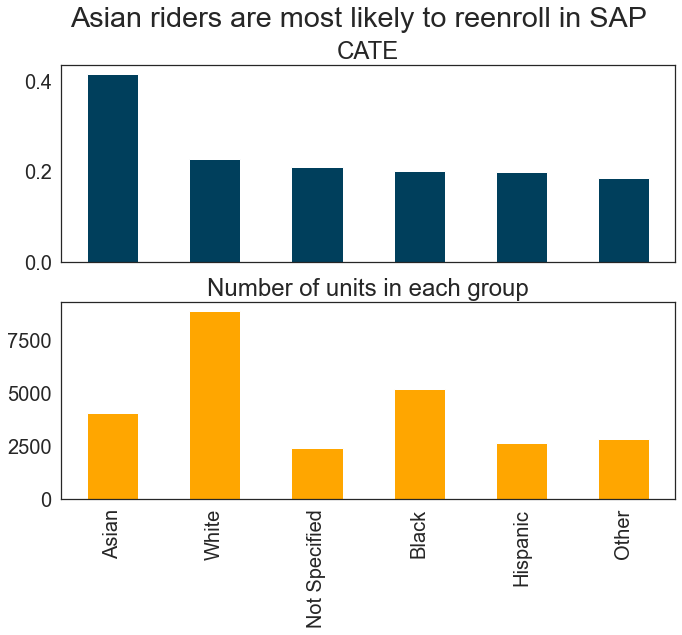

In [128]:
plt.rcParams["figure.figsize"] = (11,8)
df = df_dic['RaceDesc'][['CATE', 'Counts']]
df = df.rename(columns={"Counts": "Number of units in each group"})

df = df.rename(index=dic_race_rename)
sns.set_theme(style="white", font_scale=2)
df = df.sort_values('CATE', ascending=False)
df.plot.bar(rot=0, subplots=True, fontsize = 20, legend=False, color=['#003F5C', '#FFA600'])

plt.suptitle('Asian riders are most likely to reenroll in SAP')
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

plt.savefig(artifacts_filepath + response_var + '_' + 'RaceDesc' + '.pdf')

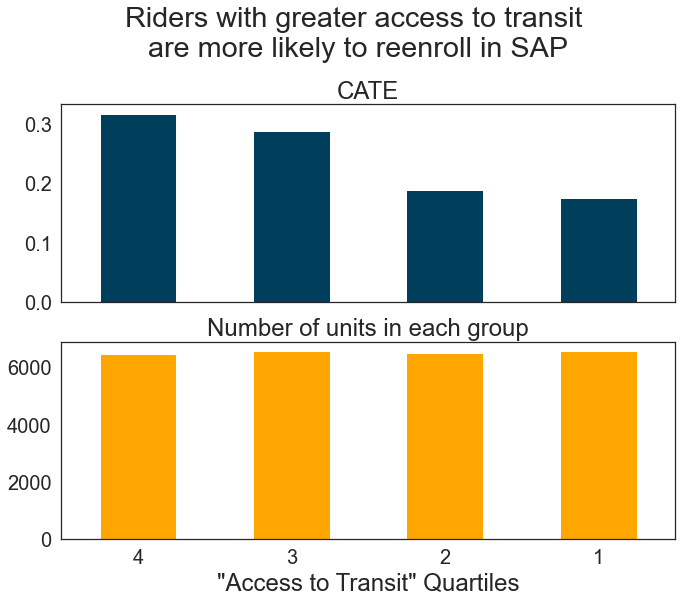

In [169]:
plt.rcParams["figure.figsize"] = (11,8)
df = df_dic['Access30Transit_quantileNum_4q'][['CATE', 'Counts']]
df = df.rename(columns={"Counts": "Number of units in each group"})

# change quartile values from [0, 1, 2, 3] to [1, 2, 3, 4]
df = df.rename(index={"0":"1",
                    "1":"2",
                    "2":"3",
                    "3":"4"})

#df = df.rename(index=dic_race_rename)
sns.set_theme(style="white", font_scale=2)
df = df.sort_values('CATE', ascending=False)
df.plot.bar(rot=0, subplots=True, fontsize = 20, legend=False, color=['#003F5C', '#FFA600'])
plt.xlabel('\"Access to Transit\" Quartiles')


plt.suptitle('Riders with greater access to transit \nare more likely to reenroll in SAP', y=1.05)
#plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

plt.savefig(artifacts_filepath + response_var + '_' + 'Access30Transit_quantileNum_4q' + '.pdf', bbox_inches='tight')



In [ ]:
plt.rcParams["figure.figsize"] = (11,8)
df = df_dic['RaceDesc'][['CATE', 'Counts']]
df = df.rename(columns={"Counts": "Number of units in each group"})

df = df.rename(index=dic_race_rename)
sns.set_theme(style="white", font_scale=2)
df = df.sort_values('CATE', ascending=False)
df.plot.bar(rot=0, subplots=True, fontsize = 20, legend=False, color=['#003F5C', '#FFA600'])

plt.suptitle('Asian riders are most likely to reenroll in SAP')
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

plt.savefig(artifacts_filepath + response_var + '_' + 'RaceDesc' + '.pdf')

In [ ]:
plt.rcParams["figure.figsize"] = (11,8)
df = df_dic['RaceDesc'][['CATE', 'Counts']]
df = df.rename(columns={"Counts": "Number of units in each group"})

df = df.rename(index=dic_race_rename)
sns.set_theme(style="white", font_scale=2)
df = df.sort_values('CATE', ascending=False)
df.plot.bar(rot=0, subplots=True, fontsize = 20, legend=False)

plt.suptitle('Asian riders are most likely to reenroll in SAP')
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

plt.savefig(artifacts_filepath + response_var + '_' + 'RaceDesc' + '.pdf')

### Creating Figure Displaying Match Group Size vs. Covariates Matched on.

<ipython-input-16-9d330d07b181>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels=x, rotation=90)


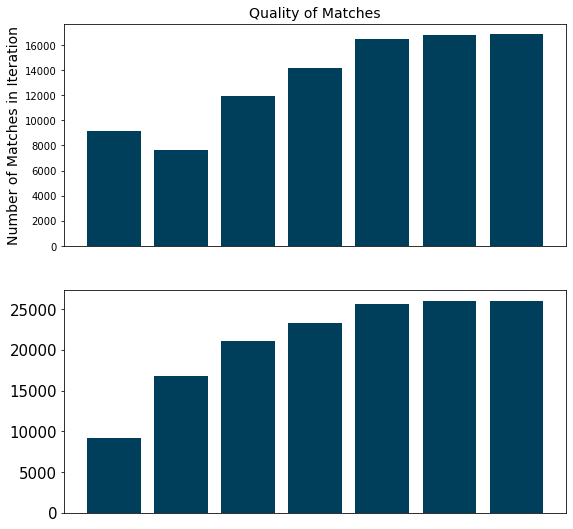

In [16]:
x = ["NONE", "AGENCY", '+AGE', '+RACE', '+Language', '+Access30Transit', '+lowwagelaborforce']
y1 = [9130, 7614, 11950, 14126, 16455, 16815, 16854] 
y2 = [9130, 16744, 21080, 23256, 25585, 25945, 25984]


f, ax = plt.subplots(ncols = 1, nrows = 2, gridspec_kw = {'width_ratios':[.51]}, figsize=(9,9))
ax[0].set_ylabel('Number of Matches in Iteration', fontsize=14)
ax[0].set_xticklabels(labels=x, rotation=90)
ax[0].set_xlabel('Covariate(s) Dropped', fontsize=14)
ax[0].set_title('Quality of Matches', fontsize=14)
ax[0].bar(x,y1, color = '#003f5c')
ax[0].axes.xaxis.set_visible(False)

# ax[1].set_ylabel('Number of Matches Made', fontsize=22)
ax[1].set_xlabel('Covariate(s) Dropped', fontsize=30)
# ax[1].set_title('Quality of Matches', fontsize=30)
ax[1].bar(x,y2, color = '#003f5c')
ax[1].tick_params(axis="y", labelsize=15)
ax[1].axes.xaxis.set_visible(False)

In [17]:
# ATE Overall.
ate_AMT = dame_flame.utils.post_processing.ATE(model_flame_AMT)
ate_AMT

0.24213574534145804

In [ ]:
# As we can see, the ATE is slightly positive, 
# implying that the subsidized annual pass (SAP) causes an enroller 
# to enroll more than non-SAP recipients by this many more times.

In [21]:
group1 = model_flame_AMT.units_per_group[2]
s_mmg = match_all.loc[group1]
s_mmg # each row of group 1.

,RaceDesc,SAP,count_enroll,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,Agency,Language,Age_bin
4011,0,0,1,3,1,1,1,0,0,0,0
4012,0,0,1,3,1,1,1,0,0,0,0
4017,0,1,2,3,1,1,1,0,0,0,0
9717,0,0,1,3,1,1,1,0,0,0,0
19312,0,0,1,3,1,1,1,0,0,0,0
23157,0,0,1,3,1,1,1,0,0,0,0
24052,0,1,1,3,1,1,1,0,0,0,0


In [22]:
s_mmg.iloc[0]["RaceDesc"] == 0 # color all group numbers of this group.

True

In [23]:
def create_df_scatter(feature, category):
    '''
    Creates a scatter plot of the size of matched group against CATE estimate.
    Note: the model name and dataframe are specified below 
    (make sure to change for different models and dataframe).
    
    feature (str): variable of interest.
    category (int): level of variable to highlight.
    '''
    group_size_overall = []
    cate_of_group = []
    in_desired_variable = []
    size_desired_group = []
    cate_desired_group = []
    

    for group in model_flame_AMT.units_per_group:

        # find len of just treated units
        df_mmg = match_all.loc[group] # chooses rows with row id in group.
        treated = df_mmg.loc[df_mmg["SAP"] == 1] # chooses the rows with treatment = 1
        desired_variable = df_mmg.iloc[0][feature] == category # true/false vector. an indicator.

        # group_size_treated.append(len(treated))
        group_size_overall.append(len(group))
        in_desired_variable.append(desired_variable)

        cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_AMT, group[0]))
        
        if desired_variable == True:
            cate_desired_group.append(dame_flame.utils.post_processing.CATE(model_flame_AMT, group[0]))
            size_desired_group.append(len(group))
        
    
    return(group_size_overall, cate_of_group, in_desired_variable, size_desired_group, cate_desired_group)


In [24]:
def create_cate_lst(sizes, cates):
    '''
    helper function to create credible interval for ATE. Creates an extended list
    where each element is the CATE for a unit.'''
    
    out = []
    for i in range(len(cates)):
        for j in range(sizes[i]):
            out.append(cates[i])
    return out 

### Scatter Plot Displaying CATES of re-enrollment

In [25]:
# Calculate the quantiles for ATE.
(size, cate_all, in_asian, size_asian, cate_asian) = create_df_scatter("RaceDesc", 2)

cate_lst = create_cate_lst(size, cate_all)

## Conf. Interval
mean_cate = sum(cate_lst)/len(cate_lst)
mean_cate

# normal approximation
lb = mean_cate - 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
ub = mean_cate + 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
print(lb, ub)  

0.23688244249823137 0.2473890481846826


Text(0, 0.5, 'CATE')

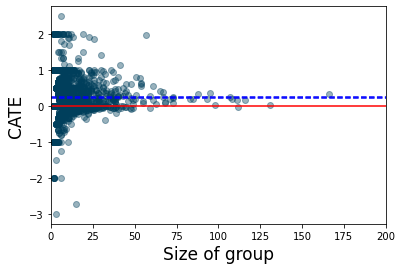

In [26]:
plt.scatter(size, cate_all, c = "#003f5c", alpha=0.4)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.axhline(y=lb, color='b', linestyle='--')
plt.axhline(y=ub, color='b', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=12)
plt.ylabel('Estimated Treatment Effect of Group', fontsize=12)
# plt.title("Visualizing Enrollment CATE of matched groups by size", fontsize=14)

plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('ate_scatter_enrollment.pdf', bbox_inches="tight")

In [27]:
# Here are the corresponding codes for race = {"White": 0, "Black or African American": 1, "Asian": 2, "Hispanic or Latino": 3, "Not Specified": 4, 'Other': 5, 'American Indian or Alaska Native': 6, "Multi-Racial": 7, "Native Hawaiian or Other Pacific Islander": 8}
(size, cate_all, in_asian, size_asian, cate_asian) = create_df_scatter("RaceDesc", 2)

In [28]:
## Conf. Interval
## Conf. Interval for Matched groups with Asian Individuals
cate_lst = create_cate_lst(size_asian, cate_asian)

mean_cate = sum(cate_lst)/len(cate_lst)
mean_cate

# normal approximation
lb = mean_cate - 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
ub = mean_cate + 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
print(lb, ub)  

0.3943904544861207 0.4252307117676056


Text(0, 0.5, 'CATE')

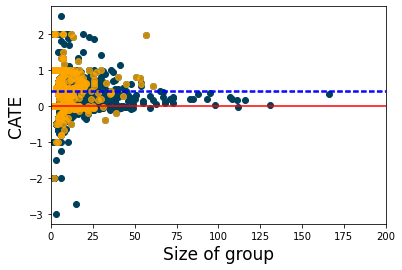

In [30]:
# Scatterplot Displaying the CATE of matched groups with Asian Individuals

cors = {True:'#bc5090', False:'#ffa600'}
asian = pd.Series(in_asian)

plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_asian, cate_asian, c = "#ffa600", alpha=.75)

plt.axhline(y=0.0, color='r', linestyle='-')
plt.axhline(y=lb, color='blue', linestyle='--')
plt.axhline(y=ub, color='blue', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('asian_enroll.pdf', bbox_inches="tight")

### Scatter for AccesstoTransit

In [31]:
# Calculate the quantiles for Lowest transit Quantile.
(size, cate_all, in_trans1, size_trans1, cate_trans1) = create_df_scatter("Access30Transit_quantileNum_4q", 0)

cate_lst = create_cate_lst(size_trans1, cate_trans1)

## Conf. Interval
mean_cate = sum(cate_lst)/len(cate_lst)

# normal approximation
lb = mean_cate - 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
ub = mean_cate + 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
print(lb, mean_cate, ub)  

0.16575335845133699 0.1752422040514177 0.1847310496514984


Text(0, 0.5, 'CATE')

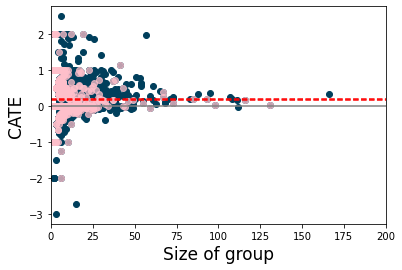

In [32]:
# Scatterplot Displaying the CATE of matched groups with transit1 individuals.
plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_trans1, cate_trans1, c = "pink", alpha=.75)

plt.axhline(y=0.0, color='grey', linestyle='-')
plt.axhline(y=lb, color='red', linestyle='--')
plt.axhline(y=ub, color='red', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('trans1_enroll.pdf', bbox_inches="tight")

In [33]:
# Calculate the quantiles for Highest transit quantile.
(size, cate_all, in_trans3, size_trans3, cate_trans3) = create_df_scatter("Access30Transit_quantileNum_4q", 3)

cate_lst = create_cate_lst(size_trans3, cate_trans3)

## Conf. Interval
mean_cate = sum(cate_lst)/len(cate_lst)

# normal approximation
lb = mean_cate - 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
ub = mean_cate + 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
print(lb, mean_cate, ub)  

0.30439171112532726 0.31492923438392384 0.3254667576425204


Text(0, 0.5, 'CATE')

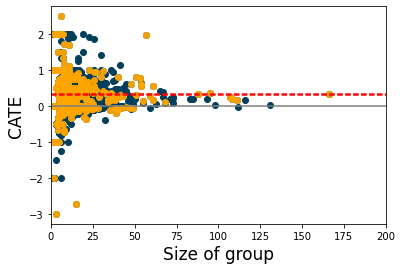

In [34]:
# Scatterplot Displaying the CATE of matched groups with transit3 individuals.
plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_trans3, cate_trans3, c = "#ffa600", alpha=0.95)

plt.axhline(y=0.0, color='gray', linestyle='-')
plt.axhline(y=lb, color='red', linestyle='--')
plt.axhline(y=ub, color='red', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('trans3_enroll.pdf', bbox_inches="tight")

In [43]:
# For each unit, we can see a table displaying the covariates it was matched on.
matched = model_flame_AMT.df_units_and_covars_matched
matched[:10]

,RaceDesc,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,Agency,Language,Age_bin
0,2,3,3,3,3,2,*,0,*
1,1,3,3,3,3,2,*,0,*
2,1,3,3,3,3,2,3,0,3
3,0,3,3,3,3,2,3,0,4
4,1,3,3,3,3,2,3,0,2
5,0,3,3,3,3,2,3,0,3
6,1,3,3,3,3,2,0,0,3
7,1,3,3,3,3,2,0,0,4
8,0,3,3,3,3,2,*,5,*
9,1,3,3,3,3,2,3,0,3


### Scatter for OverallJobAccess

In [38]:
# Calculate the quantiles for Lowest Overall Job Access Quantile.
(size, cate_all, in_Ja1, size_Ja1, cate_Ja1) = create_df_scatter("OverallJobAccess_quantileNum_4q", 0)

cate_lst = create_cate_lst(size_Ja1, cate_Ja1)

## Conf. Interval
mean_cate = sum(cate_lst)/len(cate_lst)

# normal approximation
lb = mean_cate - 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
ub = mean_cate + 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
print(lb, mean_cate, ub) 

0.16928629364170067 0.17896728805162826 0.18864828246155585


Text(0, 0.5, 'CATE')

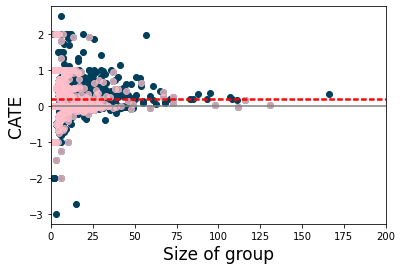

In [39]:
# Scatterplot Displaying the CATE of matched groups with Ja1 individuals.
plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_Ja1, cate_Ja1, c = "pink", alpha=.75)

plt.axhline(y=0.0, color='grey', linestyle='-')
plt.axhline(y=lb, color='red', linestyle='--')
plt.axhline(y=ub, color='red', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('Ja1_enroll.pdf', bbox_inches="tight")

In [40]:
# Calculate the quantiles for Highest Overall Job Access Quantile.
(size, cate_all, in_Ja3, size_Ja3, cate_Ja3) = create_df_scatter("OverallJobAccess_quantileNum_4q", 3)

cate_lst = create_cate_lst(size_Ja3, cate_Ja3)

## Conf. Interval
mean_cate = sum(cate_lst)/len(cate_lst)

# normal approximation
lb = mean_cate - 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
ub = mean_cate + 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
print(lb, mean_cate, ub) 

0.3127118471222903 0.32296071470868726 0.33320958229508424


Text(0, 0.5, 'CATE')

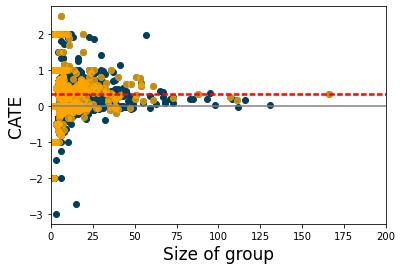

In [41]:
# Scatterplot Displaying the CATE of matched groups with Ja1 individuals.
plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_Ja3, cate_Ja3, c = "#ffa600", alpha=.75)

plt.axhline(y=0.0, color='grey', linestyle='-')
plt.axhline(y=lb, color='red', linestyle='--')
plt.axhline(y=ub, color='red', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('Ja3_enroll.pdf', bbox_inches="tight")

# Exact Matching

In [6]:
# Matching on all 9 covariates in the dataset.
model_flame_EX = dame_flame.matching.FLAME(repeats=False, verbose=3, early_stop_iterations=1, stop_unmatched_t = True, adaptive_weights='decisiontree', want_pe=True)


In [7]:
model_flame_EX.fit(holdout_data=False, treatment_column_name='SAP', outcome_column_name='count_enroll')
result_flame_EX = model_flame_EX.predict(match_all)

Iteration number:  1
	Number of matched groups formed in total:  1166
	Unmatched treated units:  5187 out of a total of  9068 treated units
	Unmatched control units:  13002 out of a total of  18251 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  9130
	Number of matches made so far:  9130
	In this iteration, the covariates dropped are:  set()
9130 units matched. We stopped before doing iteration number:  1


In [8]:
# ATE Overall Using Exacxt Matching.
ate_6 = dame_flame.utils.post_processing.ATE(model_flame_EX)
ate_6 # 0.304

0.3042368978425022

In [14]:
def create_df_scatter(feature, category):
    '''
    Creates a scatter plot of the size of matched group against CATE estimate.
    Note: the model name is specified below (make sure to change for different models).
    
    feature (str): variable of interest.
    category (int): level of variable to highlight.
    '''
    group_size_overall = []
    cate_of_group = []
    in_desired_variable = []
    size_desired_group = []
    cate_desired_group = []
    

    for group in model_flame_EX.units_per_group:

        # find len of just treated units
        df_mmg = match_all.loc[group] # chooses rows with row id in group.
        treated = df_mmg.loc[df_mmg["SAP"] == 1] # chooses the rows with treatment = 1
        desired_variable = df_mmg.iloc[0][feature] == category # true/false vector. an indicator.

        # group_size_treated.append(len(treated))
        group_size_overall.append(len(group))
        in_desired_variable.append(desired_variable)
        
        

        cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_EX, group[0]))
        
        if desired_variable == True:
            cate_desired_group.append(dame_flame.utils.post_processing.CATE(model_flame_EX, group[0]))
            size_desired_group.append(len(group))
        
    
    return(group_size_overall, cate_of_group, in_desired_variable, size_desired_group, cate_desired_group)

In [15]:
# Calculate the quantiles for ATE.
(size, cate_all, in_asian, size_asian, cate_asian) = create_df_scatter("RaceDesc", 2)

cate_lst = create_cate_lst(size, cate_all)

## Conf. Interval
mean_cate = sum(cate_lst)/len(cate_lst)
mean_cate

# normal approximation
lb = mean_cate - 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
ub = mean_cate + 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
print(lb, ub) 

0.29334508716879304 0.3151287085162162


The ATE results from exact matching are 0.30 [0.29 0.32].